#  Human mobility and COVID-19 epidemic (data and ARIMA forcast)

Student: Nguyen Xuan Tung

ID: 2005491


## Library

In [1]:
import string         #(module for string)
import sys            #(module system)
import numpy as np    #(module mathematical stuff)
import pandas as pd 
import seaborn as sns
import random 
import fileinput
import math
import operator
import scipy
import csv
import itertools
from covid19dh import covid19
import statistics

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors

from scipy.stats import poisson
from scipy import stats as sps
from scipy.interpolate import interp1d

from IPython.display import clear_output

pd.options.mode.chained_assignment = None  # default='warn'

## Dataset implement

#### Import dataset of mobility

In [2]:
df_mobility_italy = pd.read_csv("2021_IT_Region_Mobility_Report.csv",sep=',')
df_mobility_italy

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-01,-88,-90,-66.0,-83.0,-85,31
1,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-02,-69,-36,-66.0,-68.0,-49,21
2,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-03,-72,-42,-59.0,-62.0,-28,16
3,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-04,-23,15,-16.0,-45.0,-43,15
4,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-05,-47,5,-45.0,-58.0,-49,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46223,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-26,-47,-58,11.0,-26.0,-23,9
46224,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-27,-4,33,49.0,-40.0,-43,12
46225,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-28,-4,26,59.0,-40.0,-43,12
46226,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2021-12-29,-4,34,68.0,-38.0,-43,12


In [3]:
region_name_mobi = list(df_mobility_italy["sub_region_1"].dropna().unique())
region_name_mobi

['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [4]:
rmv_region_data = (np.array(df_mobility_italy['sub_region_2'].isnull()))
df_mobility_italy = df_mobility_italy[rmv_region_data]
df_mobility_italy

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-01,-88,-90,-66.0,-83.0,-85,31
1,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-02,-69,-36,-66.0,-68.0,-49,21
2,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-03,-72,-42,-59.0,-62.0,-28,16
3,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-04,-23,15,-16.0,-45.0,-43,15
4,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-05,-47,5,-45.0,-58.0,-49,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43675,IT,Italy,Veneto,NaN,NaN,IT-34,NaN,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-46,-54,-2.0,-33.0,-21,8
43676,IT,Italy,Veneto,NaN,NaN,IT-34,NaN,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-5,25,27.0,-35.0,-42,11
43677,IT,Italy,Veneto,NaN,NaN,IT-34,NaN,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-4,23,40.0,-34.0,-41,12
43678,IT,Italy,Veneto,NaN,NaN,IT-34,NaN,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-7,28,35.0,-33.0,-42,12


In [5]:
# drop the columns that we do not require for mobility analysis.
df_mobility_italy = df_mobility_italy.drop(['country_region_code', 'country_region', 'sub_region_2','metro_area','iso_3166_2_code',
        'census_fips_code'], axis=1)
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-01,-88,-90,-66.0,-83.0,-85,31
1,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-02,-69,-36,-66.0,-68.0,-49,21
2,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-03,-72,-42,-59.0,-62.0,-28,16
3,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-04,-23,15,-16.0,-45.0,-43,15
4,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2021-01-05,-47,5,-45.0,-58.0,-49,20
...,...,...,...,...,...,...,...,...,...
43675,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-46,-54,-2.0,-33.0,-21,8
43676,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-5,25,27.0,-35.0,-42,11
43677,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-4,23,40.0,-34.0,-41,12
43678,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-7,28,35.0,-33.0,-42,12


In [6]:
#drop the whole row itself if there exists NaN anywhere in dataframe.
df_mobility_italy = df_mobility_italy.dropna()
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
364,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-01,-84,-89,-49.0,-82.0,-83,29
365,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-02,-62,-29,-54.0,-65.0,-48,21
366,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-03,-67,-42,-48.0,-57.0,-28,16
367,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-04,-14,19,7.0,-32.0,-38,12
368,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-05,-38,13,-35.0,-48.0,-45,17
...,...,...,...,...,...,...,...,...,...
43675,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-46,-54,-2.0,-33.0,-21,8
43676,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-5,25,27.0,-35.0,-42,11
43677,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-4,23,40.0,-34.0,-41,12
43678,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-7,28,35.0,-33.0,-42,12


In [7]:
df_mobility_italy.drop( df_mobility_italy[ df_mobility_italy['sub_region_1'] =='Trentino-South Tyrol' ].index , inplace=True)

In [8]:
df_mobility_italy['retail_and_recreation_percent_change_from_baseline'] = df_mobility_italy['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['parks_percent_change_from_baseline'] = df_mobility_italy['parks_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['transit_stations_percent_change_from_baseline'] = df_mobility_italy['transit_stations_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['workplaces_percent_change_from_baseline'] = df_mobility_italy['workplaces_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['residential_percent_change_from_baseline'] = df_mobility_italy['residential_percent_change_from_baseline'].rolling(7).mean()
df_mobility_italy['grocery_and_pharmacy_percent_change_from_baseline'] = df_mobility_italy['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean() 

In [9]:
df_mobility_italy[df_mobility_italy["sub_region_1"]=='Veneto']

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
43316,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-01-01,-34.000000,-11.428571,16.714286,-27.428571,-46.857143,15.285714
43317,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-01-02,-34.428571,-5.428571,10.000000,-31.857143,-44.857143,16.714286
43318,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-01-03,-37.857143,-4.428571,6.000000,-38.142857,-45.285714,17.714286
43319,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-01-04,-42.000000,-7.285714,-3.285714,-44.000000,-47.428571,18.714286
43320,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-01-05,-49.000000,-12.142857,-16.714286,-51.000000,-50.285714,20.571429
...,...,...,...,...,...,...,...,...,...
43675,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-13.857143,10.857143,1.285714,-31.000000,-27.285714,6.571429
43676,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-14.714286,10.714286,4.000000,-32.714286,-32.000000,7.714286
43677,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-16.142857,9.428571,7.714286,-34.285714,-36.428571,9.000000
43678,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-18.000000,7.857143,10.571429,-36.428571,-41.000000,10.428571


-------------------------------------------------------------------------------------------------------------------------

#### Import dataset of incedence

In [10]:
df_regionInc = pd.read_csv("2.csv",sep=',')
df_regionInc

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
0,0042529a,2020-01-12,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
1,0042529a,2020-01-13,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
2,0042529a,2020-01-14,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
3,0042529a,2020-01-15,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
4,0042529a,2020-01-16,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,THA,TH,764,THB,35,NaN,Yasothon Province,NaN,NaN,THA.77_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514672,vd0neba8,2021-12-24,NaN,NaN,NaN,NaN,129018.0,53998.0,52609.0,NaN,...,BEL,BE,56,EUR,NaN,NaN,NaN,NaN,BE336,BEL.3.2_0
514673,vd0neba8,2021-12-27,NaN,NaN,NaN,NaN,129041.0,54000.0,52615.0,NaN,...,BEL,BE,56,EUR,NaN,NaN,NaN,NaN,BE336,BEL.3.2_0
514674,vd0neba8,2021-12-28,NaN,NaN,NaN,NaN,129827.0,54039.0,52685.0,NaN,...,BEL,BE,56,EUR,NaN,NaN,NaN,NaN,BE336,BEL.3.2_0
514675,vd0neba8,2021-12-29,NaN,NaN,NaN,NaN,130671.0,54097.0,52804.0,NaN,...,BEL,BE,56,EUR,NaN,NaN,NaN,NaN,BE336,BEL.3.2_0


In [11]:
df_regionInc = df_regionInc[df_regionInc.iso_alpha_3=='ITA']
df_regionInc

,id,date,confirmed,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
12700,07945170,2020-02-24,0.0,0.0,0.0,58.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12701,07945170,2020-02-25,0.0,0.0,0.0,89.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12702,07945170,2020-02-26,0.0,0.0,0.0,114.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12703,07945170,2020-02-27,0.0,0.0,0.0,141.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12704,07945170,2020-02-28,0.0,0.0,0.0,169.0,NaN,NaN,NaN,0.0,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506538,fd58ab86,2021-12-28,85519.0,1722.0,77901.0,2627871.0,2989475.0,1311546.0,1268225.0,148.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506539,fd58ab86,2021-12-29,86290.0,1723.0,78104.0,2646074.0,3006494.0,1312816.0,1268822.0,157.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506540,fd58ab86,2021-12-30,87025.0,1726.0,78314.0,2664776.0,3023366.0,1313960.0,1269627.0,159.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506541,fd58ab86,2021-12-31,88234.0,1728.0,78514.0,2686968.0,3028667.0,1314212.0,1269901.0,162.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1


In [12]:
df_regionInc = df_regionInc.dropna(thresh=2)

In [13]:
df_regionInc.drop( df_regionInc[ df_regionInc['administrative_area_level_2'] =='P.A. Trento' ].index , inplace=True)
df_regionInc.drop( df_regionInc[ df_regionInc['administrative_area_level_2'] =='P.A. Bolzano' ].index , inplace=True)

In [14]:
Infected = df_regionInc['confirmed'] -  df_regionInc['recovered'] -  df_regionInc['deaths']

In [15]:
df_regionInc.insert(3,"infected",Infected)   

In [16]:
df_regionInc['infected'] = df_regionInc['infected']

In [17]:
df_regionInc

,id,date,confirmed,infected,deaths,recovered,tests,vaccines,people_vaccinated,people_fully_vaccinated,...,iso_alpha_3,iso_alpha_2,iso_numeric,iso_currency,key_local,key_google_mobility,key_apple_mobility,key_jhu_csse,key_nuts,key_gadm
12700,07945170,2020-02-24,0.0,0.0,0.0,0.0,58.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12701,07945170,2020-02-25,0.0,0.0,0.0,0.0,89.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12702,07945170,2020-02-26,0.0,0.0,0.0,0.0,114.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12703,07945170,2020-02-27,0.0,0.0,0.0,0.0,141.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
12704,07945170,2020-02-28,0.0,0.0,0.0,0.0,169.0,NaN,NaN,NaN,...,ITA,IT,380,EUR,06,ChIJ67q-XqQzekcRgHyQFYcJBwE,Autonomous Region Friuli-Venezia Giulia,ITH4,ITH4,ITA.7_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506538,fd58ab86,2021-12-28,85519.0,5896.0,1722.0,77901.0,2627871.0,2989475.0,1311546.0,1268225.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506539,fd58ab86,2021-12-29,86290.0,6463.0,1723.0,78104.0,2646074.0,3006494.0,1312816.0,1268822.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506540,fd58ab86,2021-12-30,87025.0,6985.0,1726.0,78314.0,2664776.0,3023366.0,1313960.0,1269627.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1
506541,fd58ab86,2021-12-31,88234.0,7992.0,1728.0,78514.0,2686968.0,3028667.0,1314212.0,1269901.0,...,ITA,IT,380,EUR,20,ChIJHeK-0hzF3RIRYH0OyxW-CAE,Autonomous Region Sardinia,ITG2,ITG2,ITA.14_1


In [18]:
# check the list of provinces
region_namesInc = list(df_regionInc["administrative_area_level_2"].unique())

In [19]:
region_namesInc

['Friuli Venezia Giulia',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [20]:
df_regionInc['infected'] = df_regionInc['infected']

In [21]:
df_regionInc = df_regionInc.filter(["date","infected","administrative_area_level_2"], axis=1)
df_regionInc

,date,infected,administrative_area_level_2
12700,2020-02-24,0.0,Friuli Venezia Giulia
12701,2020-02-25,0.0,Friuli Venezia Giulia
12702,2020-02-26,0.0,Friuli Venezia Giulia
12703,2020-02-27,0.0,Friuli Venezia Giulia
12704,2020-02-28,0.0,Friuli Venezia Giulia
...,...,...,...
506538,2021-12-28,5896.0,Sardegna
506539,2021-12-29,6463.0,Sardegna
506540,2021-12-30,6985.0,Sardegna
506541,2021-12-31,7992.0,Sardegna


----------------------------------------------------------------------------------------------------------------------------

#### Combining incident and mobility dataset

In [22]:
region_name_mobi

['Abruzzo',
 'Aosta',
 'Apulia',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli-Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardy',
 'Marche',
 'Molise',
 'Piedmont',
 'Sardinia',
 'Sicily',
 'Trentino-South Tyrol',
 'Tuscany',
 'Umbria',
 'Veneto']

In [23]:
region_namesInc

['Friuli Venezia Giulia',
 'Molise',
 'Campania',
 'Veneto',
 'Basilicata',
 'Lazio',
 'Lombardia',
 'Piemonte',
 "Valle d'Aosta",
 'Sicilia',
 'Marche',
 'Calabria',
 'Liguria',
 'Umbria',
 'Emilia-Romagna',
 'Abruzzo',
 'Puglia',
 'Toscana',
 'Sardegna']

In [24]:
replace_dict = {"Friuli-Venezia Giulia":"Friuli Venezia Giulia",'Lombardy':'Lombardia','Trentino-South Tyrol':'P.A. Trento',
               'Piedmont':'Piemonte','Aosta':"Valle d'Aosta",'Sicily': 'Sicilia','Apulia':'Puglia','Tuscany':'Toscana',
               'Sardinia':'Sardegna'}

In [25]:
for i in range(len(replace_dict.keys())):
    df_mobility_italy["sub_region_1"].replace(list(replace_dict.keys())[i],list(replace_dict.values())[i], inplace=True)

In [26]:
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
364,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
365,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN
366,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN
367,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN
368,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
43675,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-13.857143,10.857143,1.285714,-31.000000,-27.285714,6.571429
43676,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-14.714286,10.714286,4.000000,-32.714286,-32.000000,7.714286
43677,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-16.142857,9.428571,7.714286,-34.285714,-36.428571,9.000000
43678,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-18.000000,7.857143,10.571429,-36.428571,-41.000000,10.428571


In [27]:
df_regionInc[df_regionInc["administrative_area_level_2"]=="Veneto"]

,date,infected,administrative_area_level_2
104673,2020-02-24,32.0,Veneto
104674,2020-02-25,42.0,Veneto
104675,2020-02-26,69.0,Veneto
104676,2020-02-27,109.0,Veneto
104677,2020-02-28,149.0,Veneto
...,...,...,...
105346,2021-12-28,75971.0,Veneto
105347,2021-12-29,80456.0,Veneto
105348,2021-12-30,86889.0,Veneto
105349,2021-12-31,93298.0,Veneto


------------------------------------------------------------------------------------------------------------------------------

## Plotting a graph of dataset

In [28]:
df_regionInc

,date,infected,administrative_area_level_2
12700,2020-02-24,0.0,Friuli Venezia Giulia
12701,2020-02-25,0.0,Friuli Venezia Giulia
12702,2020-02-26,0.0,Friuli Venezia Giulia
12703,2020-02-27,0.0,Friuli Venezia Giulia
12704,2020-02-28,0.0,Friuli Venezia Giulia
...,...,...,...
506538,2021-12-28,5896.0,Sardegna
506539,2021-12-29,6463.0,Sardegna
506540,2021-12-30,6985.0,Sardegna
506541,2021-12-31,7992.0,Sardegna


In [29]:
df_regionInc2 = df_regionInc

In [30]:
# saving the dataframe
#df_regionInc2.to_csv('dataset.csv')

In [31]:
df_mobility_italy

,sub_region_1,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
364,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN
365,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN
366,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN
367,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN
368,Abruzzo,ChIJI6qUuHc1MBMR8Hw4sppPCQE,2021-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
43675,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-26,-13.857143,10.857143,1.285714,-31.000000,-27.285714,6.571429
43676,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-27,-14.714286,10.714286,4.000000,-32.714286,-32.000000,7.714286
43677,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-28,-16.142857,9.428571,7.714286,-34.285714,-36.428571,9.000000
43678,Veneto,ChIJd7cEzPHXeEcRcHyQFYcJBwE,2021-12-29,-18.000000,7.857143,10.571429,-36.428571,-41.000000,10.428571


In [32]:
mobility_list = ['retail_and_recreation_percent_change_from_baseline',
'parks_percent_change_from_baseline',
'transit_stations_percent_change_from_baseline',
'workplaces_percent_change_from_baseline',
'residential_percent_change_from_baseline',
'grocery_and_pharmacy_percent_change_from_baseline'] 


regions_list= ['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna']

In [33]:
regions_list

['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto',
 'Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana',
 'Umbria',
 'Marche',
 'Lazio',
 'Abruzzo',
 'Molise',
 'Campania',
 'Puglia',
 'Basilicata',
 'Calabria',
 'Sicilia',
 'Sardegna']

In [34]:
sns.set()

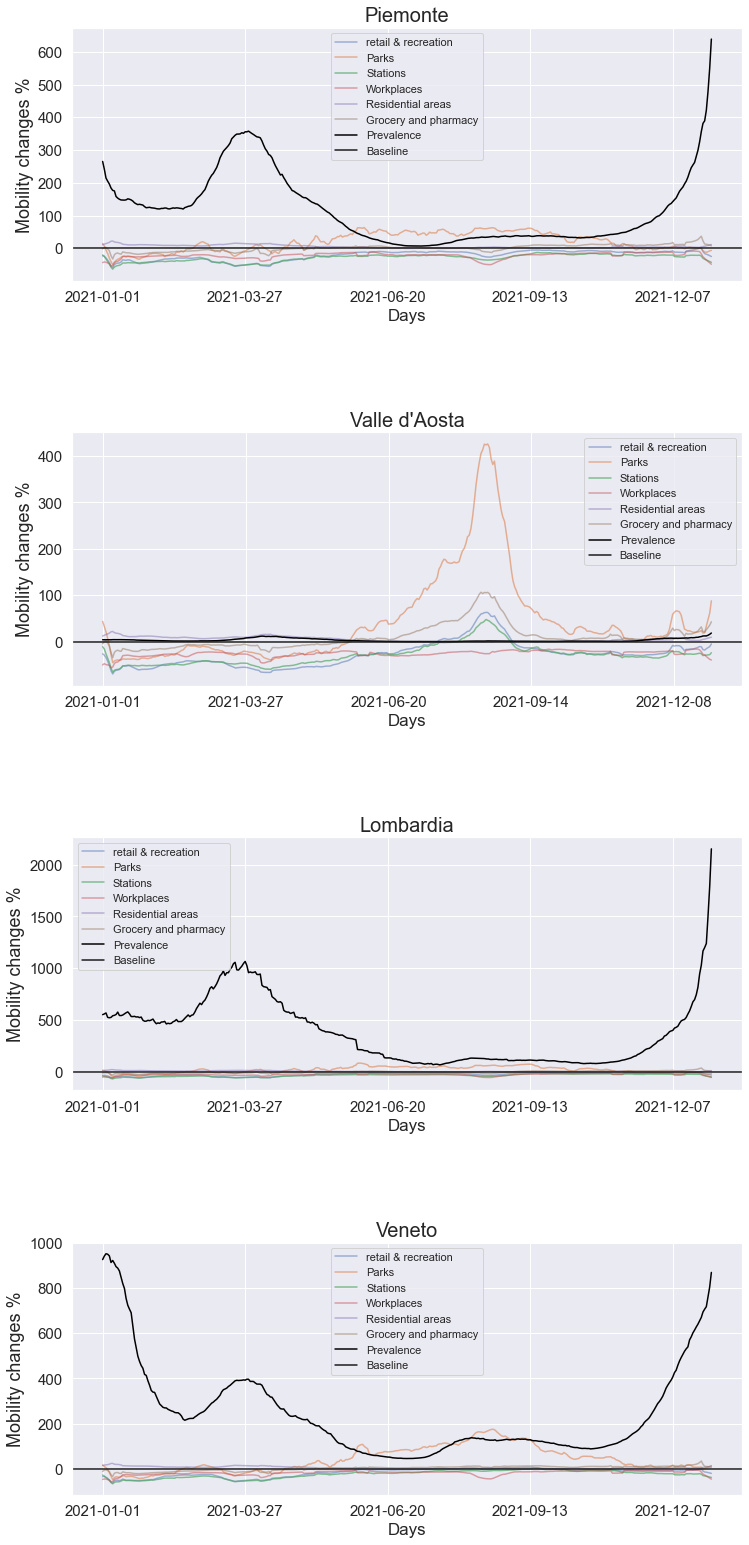

In [35]:
fig, axs = plt.subplots(4,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Piemonte',
 "Valle d'Aosta",
 'Lombardia',
 'Veneto']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-31')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2021-01-01','2021-12-31')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        axs[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="best")
        
plt.savefig('1')

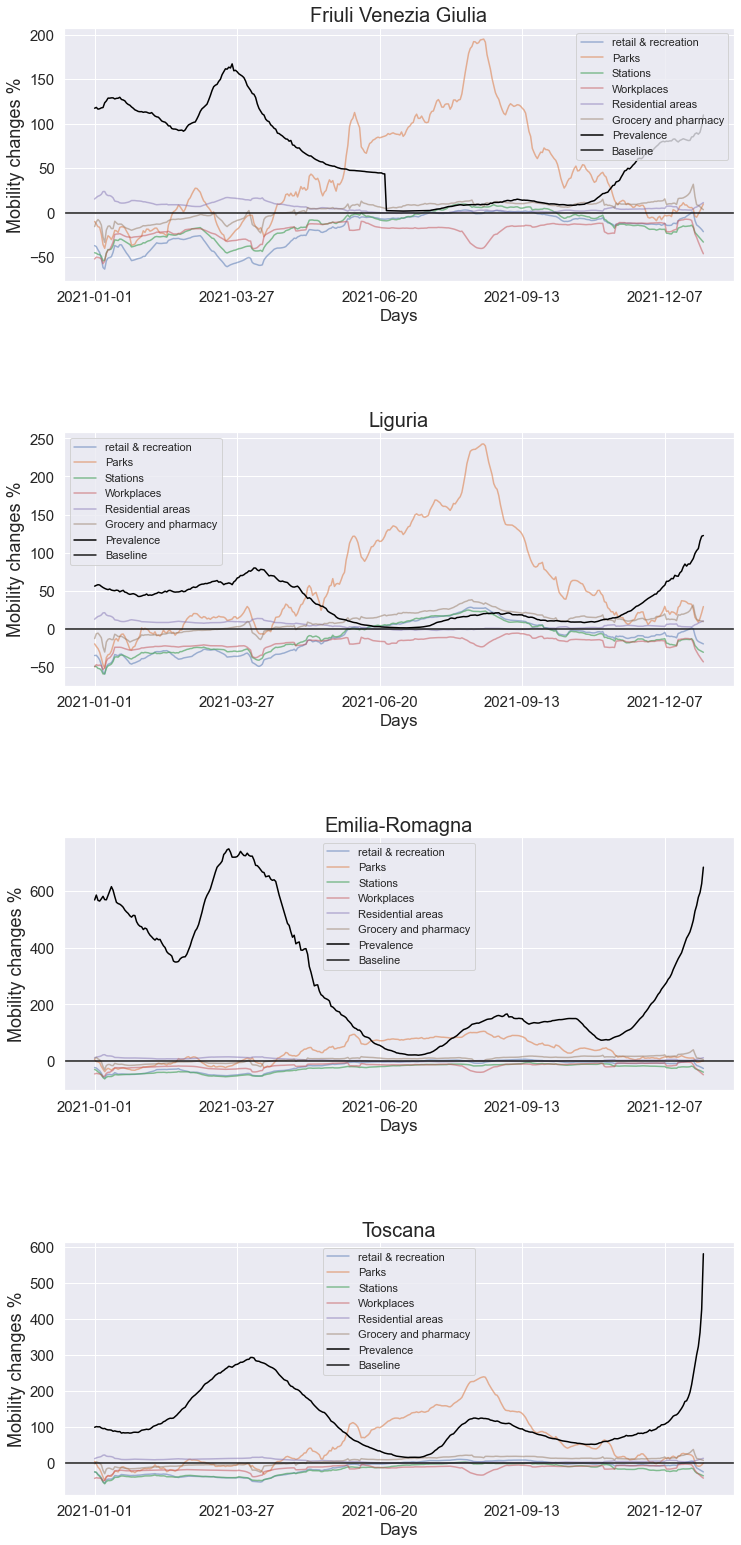

In [36]:
fig, axs = plt.subplots(4,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Friuli Venezia Giulia',
 'Liguria',
 'Emilia-Romagna',
 'Toscana']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-31')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2021-01-01','2021-12-31')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        axs[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="best")
        
plt.savefig('2')

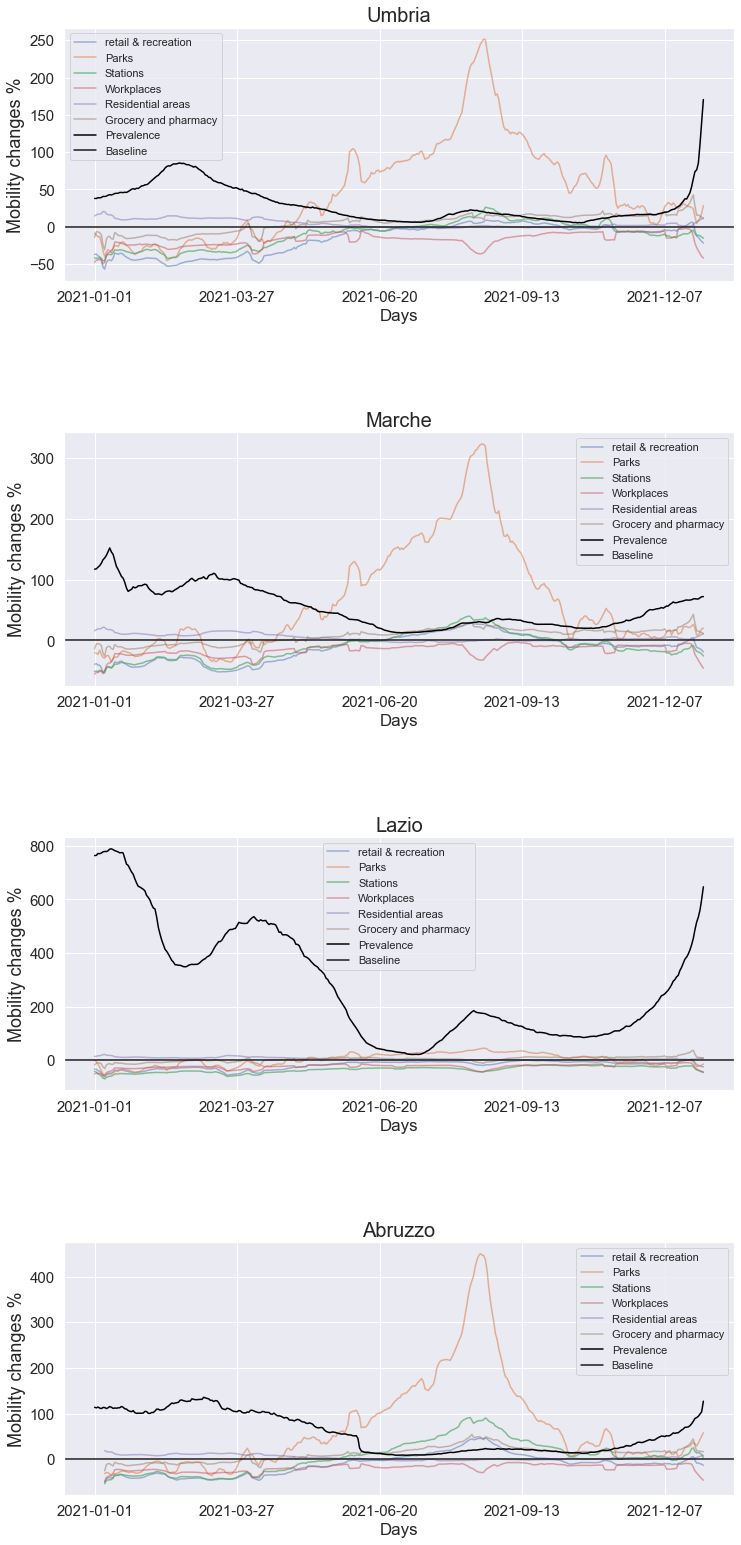

In [37]:
fig, axs = plt.subplots(4,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Umbria',
 'Marche',
 'Lazio',
 'Abruzzo']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-31')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2021-01-01','2021-12-31')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        axs[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="best")
        
plt.savefig('3')

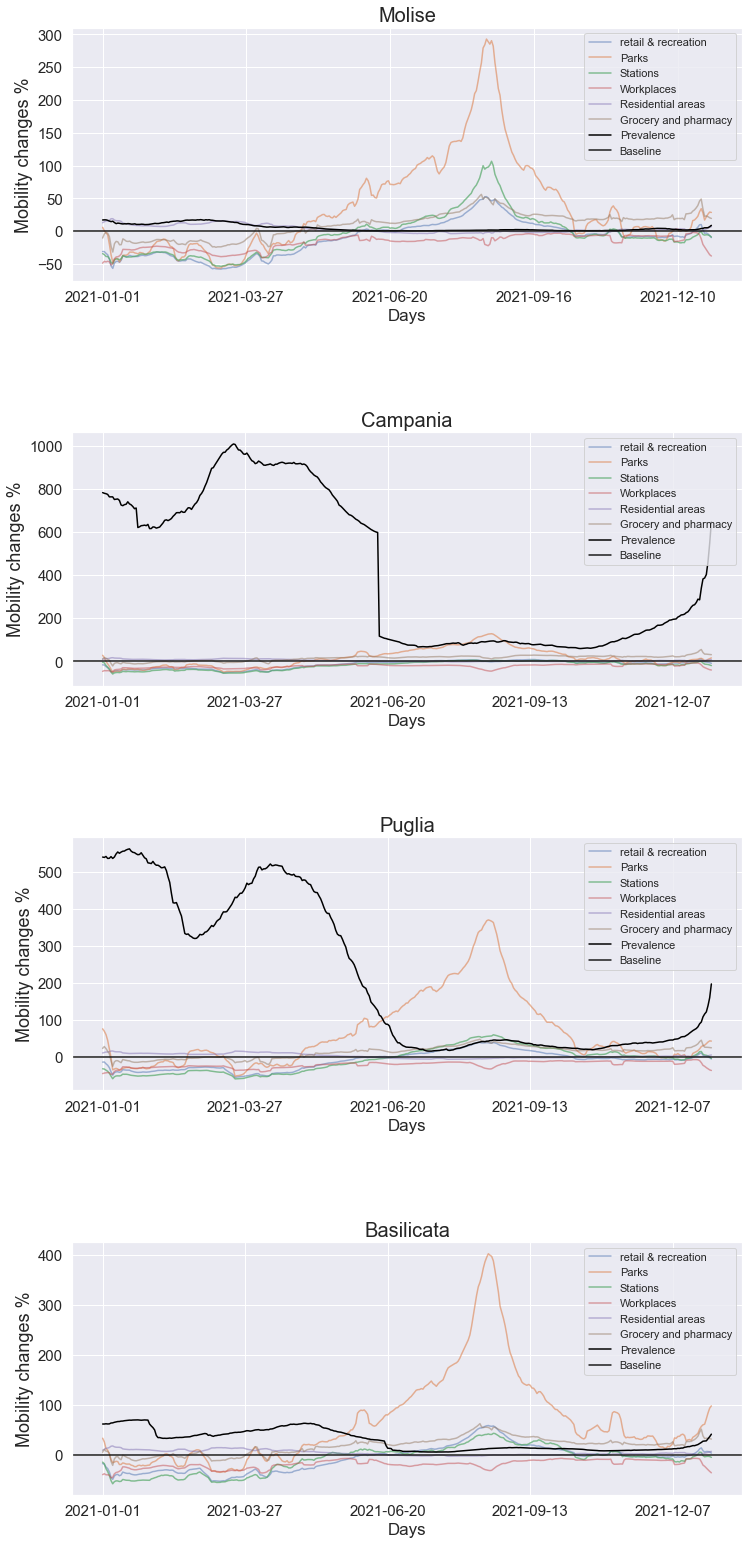

In [38]:
fig, axs = plt.subplots(4,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Molise',
 'Campania',
 'Puglia',
 'Basilicata']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-31')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2021-01-01','2021-12-31')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        axs[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="best")
        
plt.savefig('4')

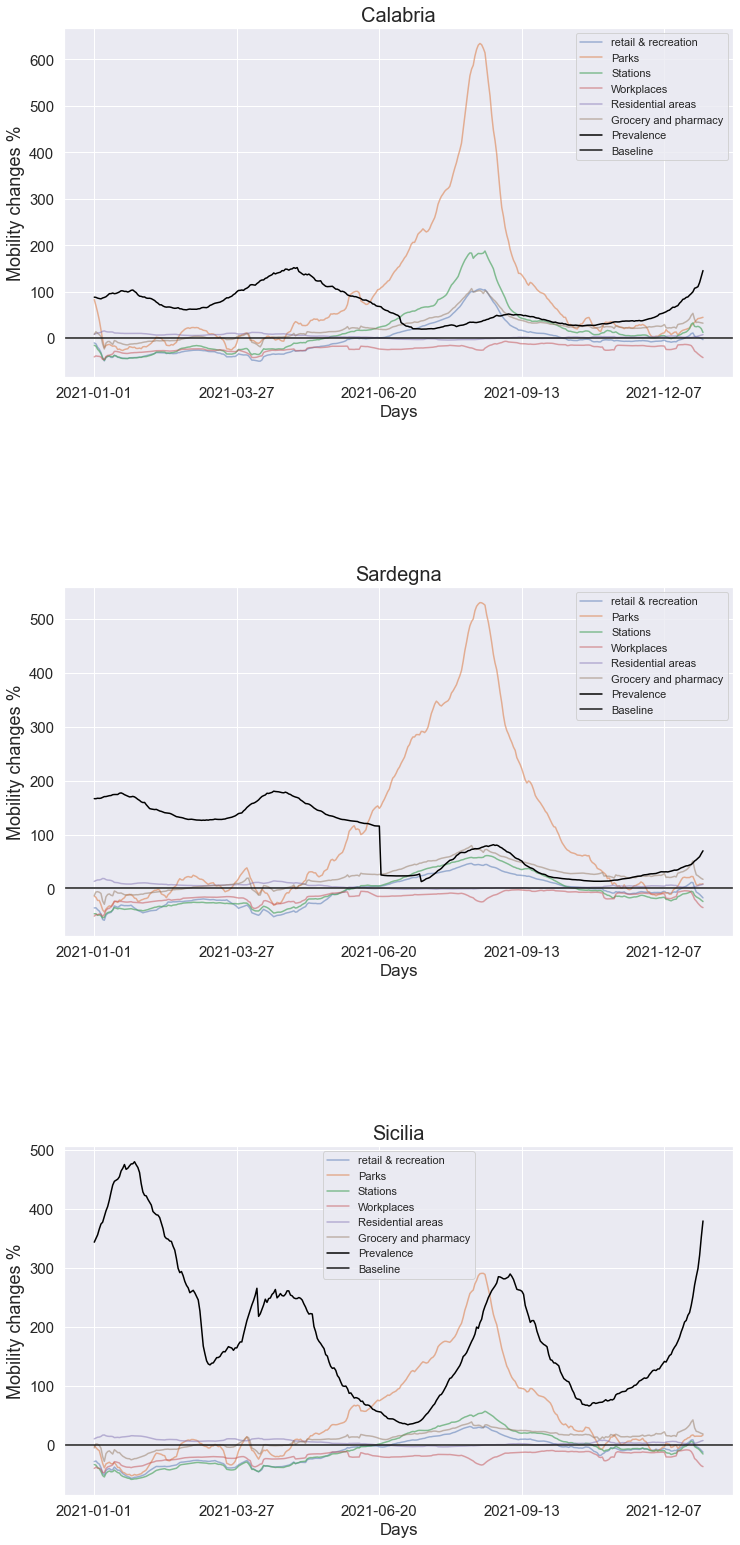

In [39]:
fig, axs = plt.subplots(3,1, figsize=(12, 27))
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
axs = axs.ravel()
for b,i in enumerate(['Calabria',
 'Sardegna',
 'Sicilia']):
        reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
        reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-31')]
        
        reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
        reg_inc = reg_inc[reg_inc['date'].between('2021-01-01','2021-12-31')]
 

        idx1 = pd.Index(reg_inc['date'])
        idx2 = pd.Index(reg_mob['date'])
               # len(reg_inc)==len(reg_mob)
        missing_dates = idx1.difference(idx2) 
        #print(missing_dates)
        for w in range(len(missing_dates)):
            reg_inc = reg_inc[reg_inc.date != missing_dates[w]]
               # len(reg_inc)==len(reg_mob)
        missing_dates2 = idx2.difference(idx1) 
        #print(missing_dates2)
        for q in range(len(missing_dates2)):
            reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
        #print(len(reg_inc))
        #print(len(reg_mob))


        y1 = reg_mob['retail_and_recreation_percent_change_from_baseline']
        y2 = reg_mob['parks_percent_change_from_baseline']
        y3 = reg_mob['transit_stations_percent_change_from_baseline']
        y4 = reg_mob['workplaces_percent_change_from_baseline']
        y5 = reg_mob['residential_percent_change_from_baseline']
        y6 = reg_mob['grocery_and_pharmacy_percent_change_from_baseline'] 
        x = reg_mob['date'] 

        pr=reg_inc['infected']/100
        axs[b].plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
        axs[b].plot(x,y2,label='Parks',alpha=0.6)
        axs[b].plot(x,y3,label='Stations',alpha=0.7)
        axs[b].plot(x,y4,label='Workplaces',alpha=0.5)
        axs[b].plot(x,y5,label='Residential areas',alpha=0.5)
        axs[b].plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
        axs[b].plot(x,pr,label='Prevalence',color="black")
        #plt.ylim((-110,230))
        #plt.xticks(rotation=45) 
        axs[b].grid(True, which='both')
        axs[b].set_xlabel('Days',size=17)
        axs[b].set_ylabel('Mobility changes %',size=18)
        axs[b].set_xticks(axs[b].get_xticks()[::85])
        axs[b].tick_params(labelsize=15)
        axs[b].set_title(i,size=20) 
        axs[b].axhline(y=0, color='k', label ='Baseline')
        axs[b].legend(loc="best")
        
plt.savefig('5')

In [40]:
reg_mob = df_mobility_italy[df_mobility_italy['sub_region_1']==i] 
reg_mob = reg_mob[reg_mob['date'].between('2021-01-01','2021-12-31')]
reg_inc = df_regionInc[df_regionInc['administrative_area_level_2']==i] 
reg_inc = reg_inc[reg_inc['date'].between('2021-01-01','2021-12-31')]
 

idx1 = pd.Index(reg_inc['date'])
idx2 = pd.Index(reg_mob['date'])

missing_dates = idx1.difference(idx2) 

for w in range(len(missing_dates)):
    reg_inc = reg_inc[reg_inc.date != missing_dates[w]]

missing_dates2 = idx2.difference(idx1) 

for q in range(len(missing_dates2)):
    reg_mob = reg_mob[reg_mob.date != missing_dates2[q]]
print(len(reg_inc))
print(len(reg_mob))

364
364


-------------------------------------------------------------------------------------------------------------

## $R_t$ data

reference link: https://www.medrxiv.org/content/10.1101/2020.05.06.20093039v3.full

In [41]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.dates import date2num, num2date
from matplotlib import dates as mdates
from matplotlib import ticker
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from scipy import stats as sps
from scipy.interpolate import interp1d

from IPython.display import clear_output

#### Estimating COVID-19's $R_t$ in Real-Time

In any epidemic, $R_t$ is the measure known as the effective reproduction number. It's the number of people who become infected per infectious person at time $t$. The most well-known version of this number is the basic reproduction number: $R_0$ when $t=0$. However, $R_0$ is a single measure that does not adapt with changes in behavior and restrictions.

As a pandemic evolves, increasing restrictions (or potential releasing of restrictions) change $R_t$. Knowing the current $R_t$ is essential. When $R>1$, the pandemic will spread through the entire population. If $R_t<1$, the pandemic will grow to some fixed number less than the population. The lower $R_t$, the more manageable the situation. The value of $R_t$ helps us (1) understand how effective our measures have been controlling an outbreak and (2) gives us vital information about whether we should increase or reduce restrictions based on our competing goals of economic prosperity and human safety. [Well-respected epidemiologists argue](https://www.nytimes.com/2020/04/06/opinion/coronavirus-end-social-distancing.html) that tracking $R_t$ is the only way to manage through this crisis.

Yet, today, to my knowledge there is no real-time tracking of $R_t$ in United States. In fact, the only real-time measure I've seen has been for [Hong Kong](https://covid19.sph.hku.hk/dashboard). More importantly, it is not useful to understand $R_t$ at a national level. Instead, to manage this crisis effectively, we need a local (state, county and/or city) level granularity of $R_t$.

What follows is a solution to this problem at the US State level. It's a modified version of a solution created by [Bettencourt & Ribeiro 2008](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0002185) to estimate real-time $R_t$ using a Bayesian approach. While I have stayed true to most of their process, my solution differs in an important way that I will call out clearly.

If you have questions, comments, or improvments feel free to get in touch: [hello@systrom.com](mailto:hello@systrom.com). And if it's not entirely clear, I'm not an epidemiologist. At the same time, data is data, and statistics are statistics and this is based on work by well-known epidemiologists so calibrate accordingly. In the meantime, I hope you can learn something new as I did by reading through this example. Feel free to take this work and apply it elsewhere – internationally or to counties in the United States.


#### Bettencourt & Ribeiro's Approach

Every day, we learn how many more people have COVID-19. This new case count gives us a clue about the current value of $R_t$. We also, figure that the value of $R_t$ today is related to the value of $R_{t-1}$ (yesterday's value) and every previous value of $R_{t-m}$ for that matter.

With these insights, the authors use [Bayes' rule](https://en.wikipedia.org/wiki/Bayes%27_theorem) to update their beliefs about the true value of $R_t$ based on how many new cases have been reported each day.

This is Bayes' Theorem as we'll use it:

$$ P(R_t|k)=\frac{P(R_t)\cdot\mathcal{L}(R_t|k)}{P(k)} $$

This says that, having seen $k$ new cases, we believe the distribution of $R_t$ is equal to:

- The __prior__ beliefs of the value of $P(R_t)$ without the data ...
- times the __likelihood__ of $R_t$ given that we've seen $k$ new cases ...
- divided by the probability of seeing this many cases in general.

Importantly, $P(k)$ is a constant, so the numerator is proportional to the posterior. Since all probability distributions sum to 1.0, we can ignore $P(k)$ and normalize our posterior to sum to 1.0:

$$ P(R_t|k) \propto P(R_t) \cdot \mathcal{L}(R_t|k) $$

This is for a single day. To make it iterative: every day that passes, we use yesterday's conclusion (ie. posterior) $P(R_{t-1}|k_{t-1})$ to be today's prior $P(R_t)$ so on day two:

$$ P(R_2|k) \propto P(R_0)\cdot\mathcal{L}(R_2|k_2)\cdot\mathcal{L}(R_1|k_1) $$

And more generally:

$$ P(R_t|k_t) \propto P(R_0) \cdot {\displaystyle \prod^{T}_{t=0}}\mathcal{L}(R_t|k_t) $$

With a uniform prior $P(R_0)$, this reduces to:

$$ P(R_t|k_t) \propto {\displaystyle \prod^{T}_{t=0}}\mathcal{L}\left(R_t|k_t\right) $$

#### Proposed Modification

This works fine, but it suffers from an issue: the posterior on any given day is equally influenced by the distant past as much as the recent day. For epidemics that have $R_t>1$ for a long time and then become under control ($R_t<1$), the posterior gets stuck. It cannot forget about the many days where $R_t>1$ so eventually $P(R_t|k)$ asymptotically approaches 1 when we know it's well under 1. The authors note this in the paper as a footnote. Unfortunately this won't work for us. __The most critical thing to know is when we've dipped below the 1.0 threshold!__

So, I propose to only incorporate the last $m$ days of the likelihood function. By doing this, the algorithm's prior is built based on the recent past which is a much more useful prior than the entire history of the epidemic. So this simple, but important change leads to the following:

$$ P(R_t|k_t) \propto {\displaystyle \prod^{T}_{t=T-m}}\mathcal{L}\left(R_t|k_t\right) $$

While this takes the last $m$ priors into account equally, you can decide to apply a windowing function (such as an exponential) to favor recent priors over more distant.

#### Choosing a Likelihood Function $\mathcal{L}\left(R_t|k_t\right)$

A likelihood function function says how likely a value of $R_t$ is given an observed number of new cases $k$.

Any time you need to model 'arrivals' over some time period of time, statisticians like to use the [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution). Given an average arrival rate of $\lambda$ new cases per day, the probability of seeing $k$ new cases is distributed according to the Poisson distribution:

$$P(k|\lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$$

In [42]:
# Column vector of k
k = np.arange(0, 70)[:, None]

# Different values of Lambda
lambdas = [10, 20, 30, 40]

# Evaluated the Probability Mass Function (remember: poisson is discrete)
y = sps.poisson.pmf(k, lambdas)

# Show the resulting shape
print(y.shape)

(70, 4)


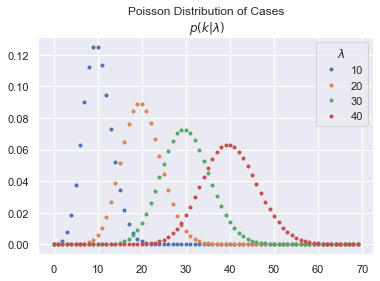

In [43]:
fig, ax = plt.subplots()

ax.set(title='Poisson Distribution of Cases\n $p(k|\lambda)$')

plt.plot(k, y,
         marker='o',
         markersize=3,
         lw=0)

plt.legend(title="$\lambda$", labels=lambdas);

The Poisson distribution says that if you think you're going to have $\lambda$ cases per day, you'll probably get that many, plus or minus some variation based on chance.

But in our case, we know there have been $k$ cases and we need to know what value of $\lambda$ is most likely. In order to do this, we fix $k$ in place while varying $\lambda$. __This is called the likelihood function.__

For example, imagine we observe $k=20$ new cases, and we want to know how likely each $\lambda$ is:

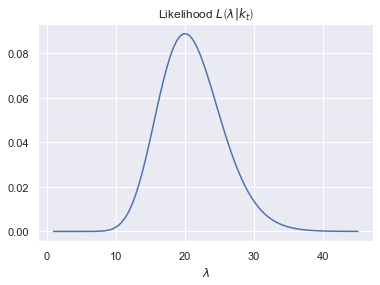

In [44]:
k = 20

lam = np.linspace(1, 45, 90)

likelihood = pd.Series(data=sps.poisson.pmf(k, lam),
                       index=pd.Index(lam, name='$\lambda$'),
                       name='lambda')

likelihood.plot(title=r'Likelihood $L\left(\lambda|k_t\right)$');

This says that if we see 20 cases, the most likely value of $\lambda$ is (not surprisingly) 20. But we're not certain: it's possible lambda was 21 or 17 and saw 20 new cases by chance alone. It also says that it's unlikely $\lambda$ was 40 and we saw 20.

Great. We have $\mathcal{L}\left(\lambda_t|k_t\right)$ which is parameterized by $\lambda$ but we were looking for $\mathcal{L}\left(R_t|k_t\right)$ which is parameterized by $R_t$. We need to know the relationship between $\lambda$ and $R_t$

#### Connecting $\lambda$ and $R_t$

__The key insight to making this work is to realize there's a connection between $R_t$ and $\lambda$__. [The derivation](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0002185) is beyond the scope of this notebook, but here it is:

$$ \lambda = k_{t-1}e^{\gamma(R_t-1)}$$

where $\gamma$ is the reciprocal of the serial interval ([about 4 days for COVID19](https://wwwnc.cdc.gov/eid/article/26/6/20-0357_article)). Since we know every new case count on the previous day, we can now reformulate the likelihood function as a Poisson parameterized by fixing $k$ and varying $R_t$.

$$ \lambda = k_{t-1}e^{\gamma(R_t-1)}$$

$$\mathcal{L}\left(R_t|k\right) = \frac{\lambda^k e^{-\lambda}}{k!}$$

#### Evaluating the Likelihood Function

To contiue our example, let's imagine a sample of new case counts $k$. What is the likelihood of different values of $R_t$ on each of those days?

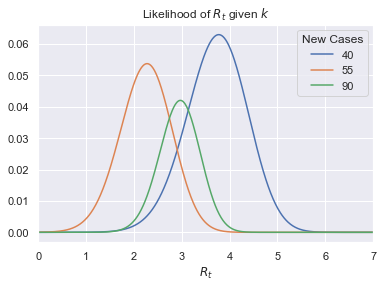

In [45]:
k = np.array([20, 40, 55, 90])

# We create an array for every possible value of Rt
R_T_MAX = 12
r_t_range = np.linspace(0, R_T_MAX, R_T_MAX*100+1)

# Gamma is 1/serial interval
# https://wwwnc.cdc.gov/eid/article/26/6/20-0357_article
GAMMA = 1/4

# Map Rt into lambda so we can substitute it into the equation below
# Note that we have N-1 lambdas because on the first day of an outbreak
# you do not know what to expect.
lam = k[:-1] * np.exp(GAMMA * (r_t_range[:, None] - 1))

# Evaluate the likelihood on each day and normalize sum of each day to 1.0
likelihood_r_t = sps.poisson.pmf(k[1:], lam)
likelihood_r_t / np.sum(likelihood_r_t, axis=0)

# Plot it
ax = pd.DataFrame(
    data = likelihood_r_t,
    index = r_t_range
).plot(
    title='Likelihood of $R_t$ given $k$',
    xlim=(0,7)
)

ax.legend(labels=k[1:], title='New Cases')
ax.set_xlabel('$R_t$');

You can see that each day we have a independent guesses for $R_t$. The goal is to combine the information we have about previous days with the current day. To do this, we use Bayes' theorem.

#### Performing the Bayesian Update

To perform the Bayesian update, we need to multiply the likelihood by the prior (which is just the previous day's likelihood) to get the posteriors. Let's do that using the cumulative product of each successive day:

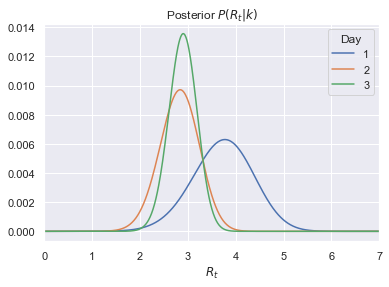

In [46]:
posteriors = likelihood_r_t.cumprod(axis=1)
posteriors = posteriors / np.sum(posteriors, axis=0)

columns = pd.Index(range(1, posteriors.shape[1]+1), name='Day')
posteriors = pd.DataFrame(
    data = posteriors,
    index = r_t_range,
    columns = columns)

ax = posteriors.plot(
    title='Posterior $P(R_t|k)$',
    xlim=(0,7)
)
ax.legend(title='Day')
ax.set_xlabel('$R_t$');

Notice how on Day 1, our posterior matches Day 1's likelihood from above? That's because we have no information other than that day. However, when we update the prior using Day 2's information, you can see the curve has moved left, but not nearly as left as the likelihood for Day 2 from above. This is because Bayesian updating uses information from both days and effectively averages the two. Since Day 3's likelihood is in between the other two, you see a small shift to the right, but more importantly: a narrower distribution. We're becoming __more__ confident in our believes of the true value of $R_t$.

From these posteriors, we can answer important questions such as "What is the most likely value of $R_t$ each day?"

In [47]:
most_likely_values = posteriors.idxmax(axis=0)
most_likely_values

Day
1    3.77
2    2.84
3    2.90
dtype: float64

We can also obtain the [highest density intervals](https://www.sciencedirect.com/topics/mathematics/highest-density-interval) for $R_t$:

> Note: I apologize in advance for the clunky brute force HDI algorithm. Please let me know if there are better ones out there.

In [48]:
def highest_density_interval(pmf, p=.9):
    # If we pass a DataFrame, just call this recursively on the columns
    if(isinstance(pmf, pd.DataFrame)):
        return pd.DataFrame([highest_density_interval(pmf[col], p=p) for col in pmf], index=pmf.columns)
    
    cumsum = np.cumsum(pmf.values)
    best = None
    for i, value in enumerate(cumsum):
        for j, high_value in enumerate(cumsum[i+1:]):
            if (high_value-value > p) and (not best or j<best[1]-best[0]):
                best = (i, i+j+1)
                break
            
    low = pmf.index[best[0]]
    high = pmf.index[best[1]]
    return pd.Series([low, high], index=[f'Low_{p*100:.0f}', f'High_{p*100:.0f}'])

hdi = highest_density_interval(posteriors)
hdi.tail()

,Low_90,High_90
Day,,
1,2.69,4.78
2,2.17,3.53
3,2.41,3.38


Finally, we can plot both the most likely values for $R_t$ and the HDIs over time. This is the most useful representation as it shows how our beliefs change with every day.

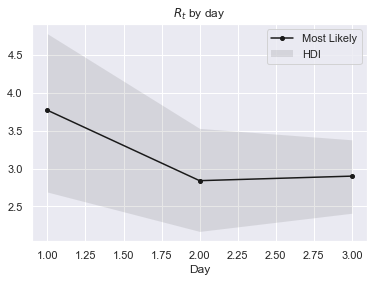

In [49]:
ax = most_likely_values.plot(marker='o',
                             label='Most Likely',
                             title=f'$R_t$ by day',
                             c='k',
                             markersize=4)

ax.fill_between(hdi.index,
                hdi['Low_90'],
                hdi['High_90'],
                color='k',
                alpha=.1,
                lw=0,
                label='HDI')

ax.legend()

We can see that the most likely value of $R_t$ changes with time and the highest-density interval narrows as we become more sure of the true value of $R_t$ over time. Note that since we only had four days of history, I did not apply my windowing modification to this sample. Next, however, we'll turn to a real-world application where this modification is necessary.

#### Read the data

In [50]:
states = pd.read_csv('Rt.csv',
                     usecols=[0,1,3],
                     index_col=['sub_region_1', 'date'], 
                     parse_dates=['date'], squeeze=True).sort_index()
                    

In [51]:
states.tail()

sub_region_1  date      
Veneto        2021-12-26    70639
              2021-12-27    71761
              2021-12-28    75971
              2021-12-29    80456
              2021-12-30    86889
Name: infected, dtype: int64

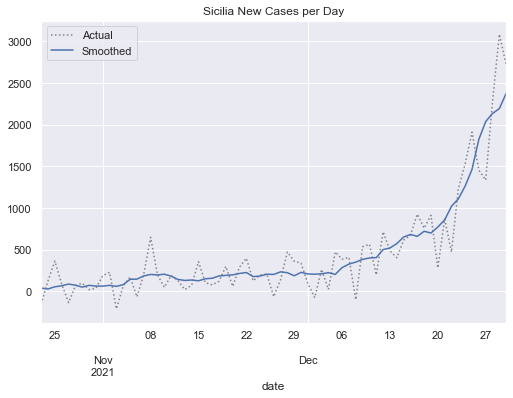

In [52]:
region = 'Sicilia'

def prepare_cases(cases, cutoff=25):
    new_cases = cases.diff()

    smoothed = new_cases.rolling(7,
        win_type='gaussian',
        min_periods=1,
        center=True).mean(std=7).round()

    idx_start = np.searchsorted(smoothed, cutoff)
    smoothed = smoothed.iloc[idx_start:]
    original = new_cases.loc[smoothed.index]
    
    return original, smoothed

#cases = states.xs(region).rename(f"{region} cases")

original, smoothed = prepare_cases(states.xs(region))

original.plot(title=f"{region} New Cases per Day",
               c='k',
               linestyle=':',
               alpha=.5,
               label='Actual',
               legend=True,
               figsize=(600/72, 400/72))

ax = smoothed.plot(label='Smoothed',
                   legend=True)
ax.get_figure().set_facecolor('w')

#### Function for Calculating the Posteriors

To calculate the posteriors we follow these steps:
1. Calculate $\lambda$ - the expected arrival rate for every day's poisson process
2. Calculate each day's likelihood distribution over all possible values of $R_t$
3. Calculate the Gaussian process matrix based on the value of $\sigma$ we discussed above
4. Calculate our initial prior because our first day does not have a previous day from which to take the posterior
  - Based on [info from the cdc](https://wwwnc.cdc.gov/eid/article/26/7/20-0282_article) we will choose a Gamma with mean 4.
5. Loop from day 1 to the end, doing the following:
  - Calculate the prior by applying the Gaussian to yesterday's prior.
  - Apply Bayes' rule by multiplying this prior and the likelihood we calculated in step 2.
  - Divide by the probability of the data (also Bayes' rule)

In [53]:
def get_posteriors(sr, sigma=0.15):
    cols = sr.index

    # (1) Calculate Lambda
    lam = sr[:-1].values * np.exp(GAMMA * (r_t_range[:, None] - 1))

    
    # (2) Calculate each day's likelihood
    likelihoods = pd.DataFrame(
        data = sps.poisson.pmf(sr[1:].values, lam),
        index = r_t_range,
        columns = sr.index[1:])
    
    # (3) Create the Gaussian Matrix
    process_matrix = sps.norm(loc=r_t_range,
                              scale=sigma
                             ).pdf(r_t_range[:, None]) 

    # (3a) Normalize all rows to sum to 1
    process_matrix /= process_matrix.sum(axis=0)
    
    # (4) Calculate the initial prior
    prior0 = sps.gamma(a=4).pdf(r_t_range)
    prior0 /= prior0.sum()

    # Create a DataFrame that will hold our posteriors for each day
    # Insert our prior as the first posterior.
    posteriors = pd.DataFrame(
        index=r_t_range,
        columns=sr.index,
        data={sr.index[0]: prior0}
    )
    
    # We said we'd keep track of the sum of the log of the probability
    # of the data for maximum likelihood calculation.
    log_likelihood = 0.0

    # (5) Iteratively apply Bayes' rule
    for previous_day, current_day in zip(sr.index[:-1], sr.index[1:]):

        #(5a) Calculate the new prior
        current_prior = process_matrix @ posteriors[previous_day]
        
        #(5b) Calculate the numerator of Bayes' Rule: P(k|R_t)P(R_t)
        numerator = likelihoods[current_day] * current_prior
                
        #(5c) Calcluate the denominator of Bayes' Rule P(k)
        denominator = np.sum(numerator)
        
        if denominator == 0:
            posteriors[current_day] = 0
            continue
        
        # Execute full Bayes' Rule
        posteriors[current_day] = numerator/denominator
        
        # Add to the running sum of log likelihoods
        log_likelihood += np.log(denominator)
    
    return posteriors, log_likelihood

# Note that we're fixing sigma to a value just for the example
posteriors, log_likelihood = get_posteriors(smoothed, sigma=.15)

In [54]:
posteriors

date,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01,...,2021-12-21,2021-12-22,2021-12-23,2021-12-24,2021-12-25,2021-12-26,2021-12-27,2021-12-28,2021-12-29,2021-12-30
0.00,0.000000e+00,2.256004e-04,1.837884e-08,6.121358e-10,5.402392e-13,8.269423e-09,0.000026,9.095815e-08,0.000003,0.000005,...,2.885252e-32,5.512411e-48,3.592411e-42,2.667524e-50,3.594377e-61,7.448541e-94,1.648788e-76,8.823666e-56,2.503716e-47,3.103716e-62
0.01,1.653859e-09,2.524765e-04,2.151839e-08,7.305539e-10,6.803395e-13,1.007864e-08,0.000030,1.089092e-07,0.000004,0.000005,...,7.676223e-32,1.950751e-47,1.254957e-41,1.107477e-49,1.887734e-60,6.774636e-93,1.409115e-75,5.838389e-55,1.455935e-46,2.444445e-61
0.02,1.309922e-08,2.818345e-04,2.514203e-08,8.708239e-10,8.559032e-13,1.226919e-08,0.000034,1.301949e-07,0.000004,0.000006,...,2.029110e-31,6.855527e-47,4.349652e-41,4.559385e-49,9.822946e-60,6.098382e-92,1.189647e-74,3.811746e-54,8.349538e-46,1.898060e-60
0.03,4.376997e-08,3.138172e-04,2.931695e-08,1.036813e-09,1.075696e-12,1.491810e-08,0.000039,1.554005e-07,0.000005,0.000007,...,5.329096e-31,2.392512e-46,1.495744e-40,1.861300e-48,5.064304e-59,5.433119e-91,9.921341e-74,2.455449e-53,4.722094e-45,1.452978e-59
0.04,1.027187e-07,3.485668e-04,3.411878e-08,1.233048e-09,1.350597e-12,1.811722e-08,0.000044,1.852077e-07,0.000006,0.000008,...,1.390551e-30,8.291569e-46,5.103065e-40,7.534577e-48,2.586830e-58,4.790510e-90,8.173219e-73,1.560641e-52,2.633583e-44,1.096518e-58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.96,1.827565e-05,4.199913e-210,1.033359e-266,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11.97,1.813923e-05,9.943651e-211,1.706608e-267,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11.98,1.800379e-05,2.339483e-211,2.806599e-268,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
11.99,1.786932e-05,5.469192e-212,4.596076e-269,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


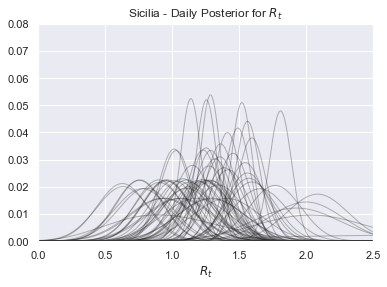

In [55]:
ax = posteriors.plot(title=f'{region} - Daily Posterior for $R_t$',
           legend=False, 
           lw=1,
           c='k',
           alpha=.3,
           xlim=(0,2.5),
           ylim=(0,0.08))

ax.set_xlabel('$R_t$');

In [56]:
# Note that this takes a while to execute - it's not the most efficient algorithm
hdis = highest_density_interval(posteriors, p=.9)

most_likely = posteriors.idxmax().rename('ML')

# Look into why you shift -1
result = pd.concat([most_likely, hdis], axis=1)

result.head()

,ML,Low_90,High_90
date,,,
2021-10-23,3.00,1.01,6.99
2021-10-24,0.89,0.33,1.66
2021-10-25,2.03,1.36,2.72
2021-10-26,1.93,1.41,2.49
2021-10-27,2.00,1.54,2.45


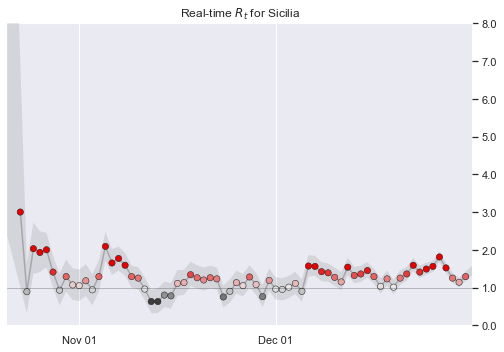

In [57]:
def plot_rt(result, ax, region):
    
    ax.set_title(f"{region}")
    
    # Colors
    ABOVE = [1,0,0]
    MIDDLE = [1,1,1]
    BELOW = [0,0,0]
    cmap = ListedColormap(np.r_[
        np.linspace(BELOW,MIDDLE,25),
        np.linspace(MIDDLE,ABOVE,25)
    ])
    color_mapped = lambda y: np.clip(y, .5, 1.5)-.5
    
    index = result['ML'].index.get_level_values('date')
    values = result['ML'].values
    
    # Plot dots and line
    ax.plot(index, values, c='k', zorder=1, alpha=.25)
    ax.scatter(index,
               values,
               s=40,
               lw=.5,
               c=cmap(color_mapped(values)),
               edgecolors='k', zorder=2)
    
    # Aesthetically, extrapolate credible interval by 1 day either side
    lowfn = interp1d(date2num(index),
                     result['Low_90'].values,
                     bounds_error=False,
                     fill_value='extrapolate')
    
    highfn = interp1d(date2num(index),
                      result['High_90'].values,
                      bounds_error=False,
                      fill_value='extrapolate')
    
    extended = pd.date_range('2021-10-21',
                             end=index[-1]+pd.Timedelta(days=1))
    
    ax.fill_between(extended,
                    lowfn(date2num(extended)),
                    highfn(date2num(extended)),
                    color='k',
                    alpha=.1,
                    lw=0,
                    zorder=3)

    ax.axhline(1.0, c='k', lw=1, label='$R_t=1.0$', alpha=.25);
    
    # Formatting
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}"))
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.margins(0)
    ax.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
    ax.margins(0)
    ax.set_ylim(0.0, 8.0)
    ax.set_xlim(pd.Timestamp('2021-10-21'), result.index.get_level_values('date')[-1]+pd.Timedelta(days=1))
    fig.set_facecolor('w')

    
fig, ax = plt.subplots(figsize=(600/72,400/72))

plot_rt(result, ax, region)
ax.set_title(f'Real-time $R_t$ for {region}')
#ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

In [58]:
sigmas = np.linspace(1/20, 1, 50)
FILTERED_REGIONS = ['AS', 'GU', 'PR', 'VI', 'MP']
targets = ~states.index.get_level_values('sub_region_1').isin(FILTERED_REGIONS)
states_to_process = states.loc[targets]

results = {}

for state_name, cases in states_to_process.groupby(level='sub_region_1'):
    print(state_name)
    new, smoothed = prepare_cases(cases, cutoff=25)
    
    if len(smoothed) == 0:
        new, smoothed = prepare_cases(cases, cutoff=5)
        
    # CHANGED: some states in Br have very reported few cases, we ignore those for calculation.
    if len(smoothed) == 0: 
        clear_output(wait=True)
        continue
    
    result = {}
    
    # Holds all posteriors with every given value of sigma
    result['posteriors'] = []
    
    # Holds the log likelihood across all k for each value of sigma
    result['log_likelihoods'] = []
    
    for sigma in sigmas:
        posteriors, log_likelihood = get_posteriors(smoothed, sigma=sigma)
        result['posteriors'].append(posteriors)
        result['log_likelihoods'].append(log_likelihood)
    
    # Store all results keyed off of state name
    results[state_name] = result
    clear_output(wait=True)

print('Done.')

Done.


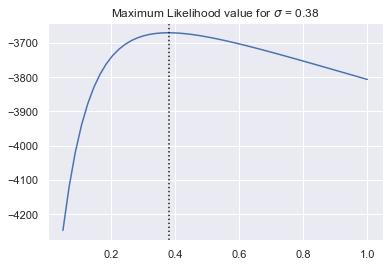

In [59]:
# Each index of this array holds the total of the log likelihoods for
# the corresponding index of the sigmas array.
total_log_likelihoods = np.zeros_like(sigmas)

# Loop through each state's results and add the log likelihoods to the running total.
for state_name, result in results.items():
    total_log_likelihoods += result['log_likelihoods']

# Select the index with the largest log likelihood total
max_likelihood_index = total_log_likelihoods.argmax()

# Select the value that has the highest log likelihood
sigma = sigmas[max_likelihood_index]

# Plot it
fig, ax = plt.subplots()
ax.set_title(f"Maximum Likelihood value for $\sigma$ = {sigma:.2f}");
ax.plot(sigmas, total_log_likelihoods)
ax.axvline(sigma, color='k', linestyle=":")

In [60]:
final_results = None

for state_name, result in results.items():
    if state_name in FILTERED_REGIONS: continue
    print(state_name)
    posteriors = result['posteriors'][max_likelihood_index]
    hdis_90 = highest_density_interval(posteriors, p=.9)
    hdis_50 = highest_density_interval(posteriors, p=.5)
    most_likely = posteriors.idxmax().rename('ML')
    result = pd.concat([most_likely, hdis_90, hdis_50], axis=1)
    if final_results is None:
        final_results = result
    else:
        final_results = pd.concat([final_results, result])
    clear_output(wait=True)

print('Done.')

Done.


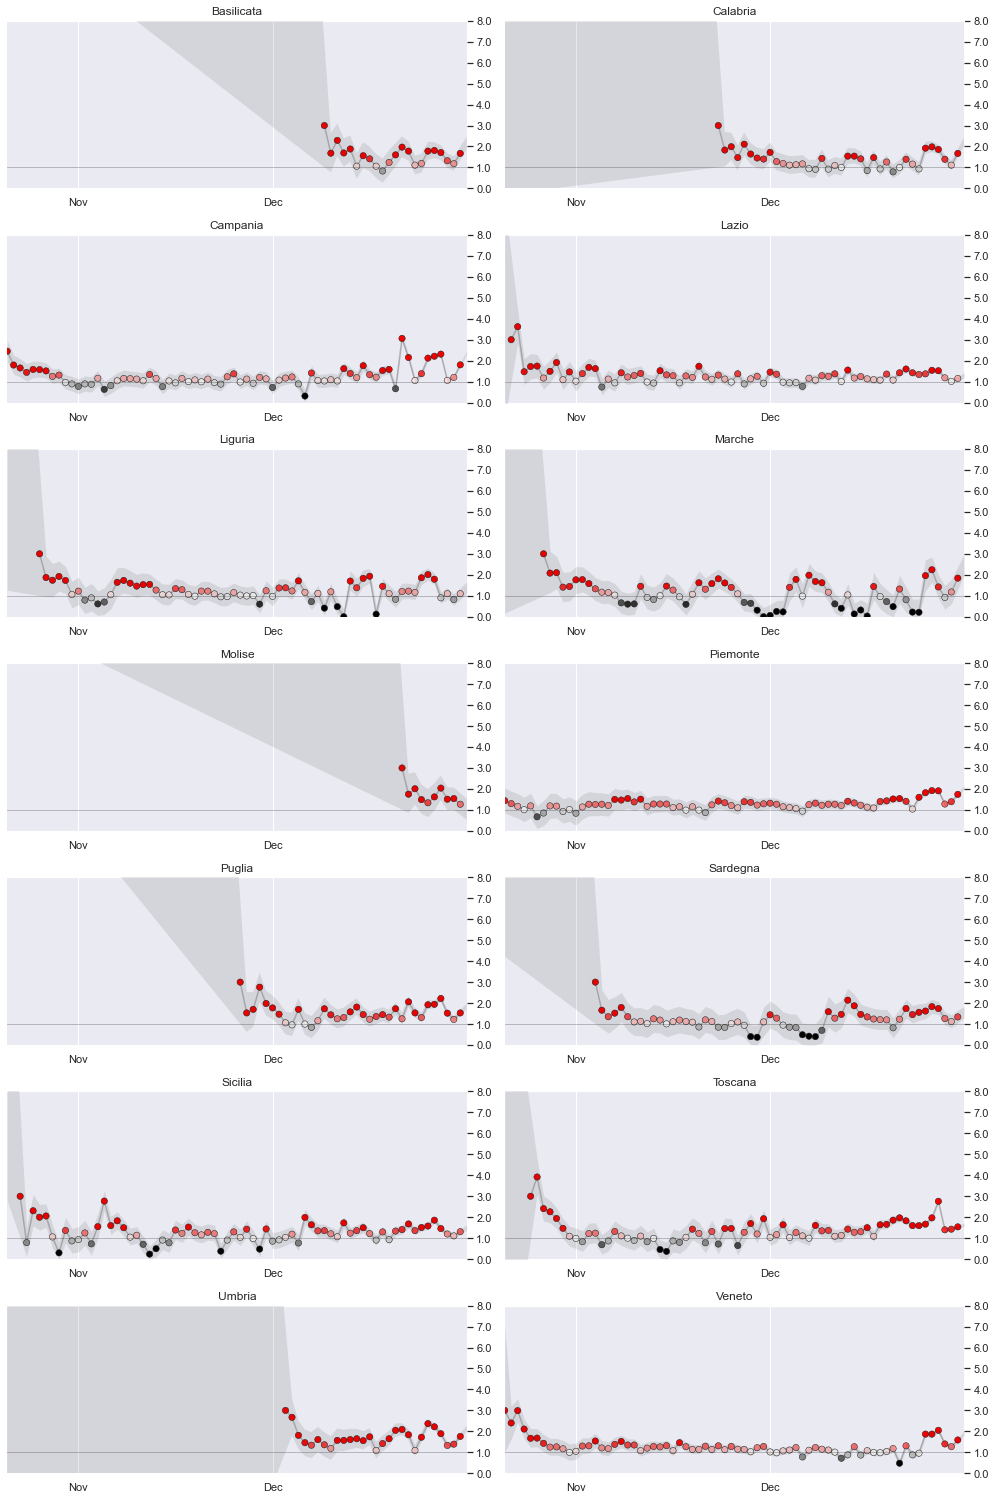

In [61]:
ncols = 2
nrows = int(np.ceil(len(results) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, nrows*3))

for i, (state_name, result) in enumerate(final_results.groupby('sub_region_1')):
    if result.shape[0] < 2: continue
    plot_rt(result, axes.flat[i], state_name)

fig.tight_layout()
fig.set_facecolor('w')

plt.savefig('R_t')

In [62]:
final_results = final_results.groupby('sub_region_1').apply(lambda x: x.iloc[1:].droplevel(0))

In [63]:
final_results.to_csv('rt_old.csv')

In [64]:
FULL_COLOR = [.7,.7,.7]
NONE_COLOR = [179/255,35/255,14/255]
PARTIAL_COLOR = [.5,.5,.5]
ERROR_BAR_COLOR = [.3,.3,.3]

no_lockdown = []
partial_lockdown = []

C:\Users\ADMIN\lib\site-packages\ipykernel_launcher.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator


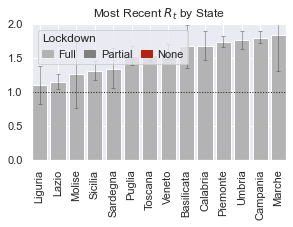

In [65]:
filtered = final_results.index.get_level_values(0).isin(FILTERED_REGIONS)
mr = final_results.loc[~filtered].groupby(level=0)[['ML', 'High_90', 'Low_90']].last()

def plot_standings(mr, figsize=None, title='Most Recent $R_t$ by State'):
    if not figsize:
        figsize = ((15.9/50)*len(mr)+.1,2.5)
        
    fig, ax = plt.subplots(figsize=figsize)

    ax.set_title(title)
    err = mr[['Low_90', 'High_90']].sub(mr['ML'], axis=0).abs()
    bars = ax.bar(mr.index,
                  mr['ML'],
                  width=.825,
                  color=FULL_COLOR,
                  ecolor=ERROR_BAR_COLOR,
                  capsize=2,
                  error_kw={'alpha':.5, 'lw':1},
                  yerr=err.values.T)

    for bar, state_name in zip(bars, mr.index):
        if state_name in no_lockdown:
            bar.set_color(NONE_COLOR)
        if state_name in partial_lockdown:
            bar.set_color(PARTIAL_COLOR)

    labels = mr.index.to_series().replace({'District of Columbia':'DC'})
    ax.set_xticklabels(labels, rotation=90, fontsize=11)
    ax.margins(0)
    ax.set_ylim(0,2.)
    ax.axhline(1.0, linestyle=':', color='k', lw=1)

    leg = ax.legend(handles=[
                        Patch(label='Full', color=FULL_COLOR),
                        Patch(label='Partial', color=PARTIAL_COLOR),
                        Patch(label='None', color=NONE_COLOR)
                    ],
                    title='Lockdown',
                    ncol=3,
                    loc='upper left',
                    columnspacing=.75,
                    handletextpad=.5,
                    handlelength=1)

    leg._legend_box.align = "left"
    fig.set_facecolor('w')
    return fig, ax

mr.sort_values('ML', inplace=True)
plot_standings(mr);

C:\Users\ADMIN\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


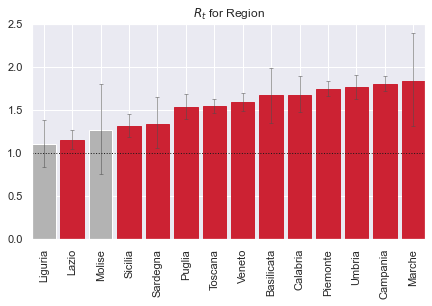

In [66]:
filtered = final_results.index.get_level_values(0).isin(FILTERED_REGIONS)
mr = final_results.loc[~filtered].groupby(level=0)[['ML', 'High_90', 'Low_90']].last()

# 507x285
def plot_standings(mr, figsize=None, title='$R_t$ for Region'):
    if not figsize:
        figsize = ((15.9/50)*len(mr)+.1,2.5)
        
    fig, ax = plt.subplots(figsize=figsize)

    ax.set_title(title)
    err = mr[['Low_90', 'High_90']].sub(mr['ML'], axis=0).abs()
    bars = ax.bar(mr.index,
                  mr['ML'],
                  width=.825,
                  color=FULL_COLOR,
                  ecolor=ERROR_BAR_COLOR,
                  capsize=2,
                  error_kw={'alpha':.5, 'lw':1},
                  yerr=err.values.T)

    for bar, state_name in zip(bars, mr.index):
        if mr['Low_90'][state_name] > 1:
            bar.set_color("#C23")
        if mr['High_90'][state_name] < 1:
            bar.set_color("#090")

    labels = mr.index.to_series()
    ax.set_xticklabels(labels, rotation=90, fontsize=11)
    ax.margins(0)
    ax.set_ylim(0,2.5)
    ax.axhline(1.0, linestyle=':', color='k', lw=1)

    fig.set_facecolor('w')
    return fig, ax

mr.sort_values('ML', inplace=True)
fig, ax = plot_standings(mr, (507/72, 285/72))

plt.savefig('R_t_value')

Real $R_t$ data is collected in the link: https://github.com/epiforecasts/covid-rt-estimates/tree/master/subnational/italy/cases/summary

In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#from skmisc.loess import loess
#import operator
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from scipy import stats
from datetime import datetime
from datetime import timedelta

In [68]:
data = 'rt_value.csv'
data_table = pd.read_csv(data,sep=',')
df = pd.DataFrame(data_table)
df

,region,date,strat,type,median,mean,sd,lower_90,lower_50,lower_20,upper_20,upper_50,upper_90
0,Abruzzo,2021-09-20,NaN,estimate,0.872565,0.876741,0.097253,0.724500,0.810238,0.849405,0.897141,0.936719,1.040997
1,Abruzzo,2021-09-21,NaN,estimate,0.874433,0.877195,0.088158,0.736908,0.816285,0.852991,0.895120,0.933805,1.022161
2,Abruzzo,2021-09-22,NaN,estimate,0.876556,0.878414,0.080144,0.750884,0.821949,0.857327,0.895697,0.930370,1.011481
3,Abruzzo,2021-09-23,NaN,estimate,0.879761,0.880488,0.073245,0.763455,0.829725,0.862059,0.898415,0.927982,1.001359
4,Abruzzo,2021-09-24,NaN,estimate,0.883969,0.883510,0.067467,0.772477,0.837138,0.867073,0.900487,0.926649,0.995732
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,Veneto,2022-01-20,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2535,Veneto,2022-01-21,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2536,Veneto,2022-01-22,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241
2537,Veneto,2022-01-23,NaN,forecast,1.325944,1.326646,0.122180,1.125822,1.250245,1.297118,1.355487,1.405482,1.525241


In [69]:
#df = df.dropna()
regions= list(df.region.unique())
regions


['Abruzzo',
 'Basilicata',
 'Calabria',
 'Campania',
 'Emilia-Romagna',
 'Friuli Venezia Giulia',
 'Lazio',
 'Liguria',
 'Lombardia',
 'Marche',
 'Molise',
 'Piemonte',
 'Puglia',
 'Sardegna',
 'Sicilia',
 'Toscana',
 'Trentino-Alto Adige',
 'Umbria',
 "Valle d'Aosta",
 'Veneto']

In [70]:
df_r=df[df['region'] == regions[-1]]
df_r=df_r[df_r['date'].between("2021-09-20","2021-12-31")]

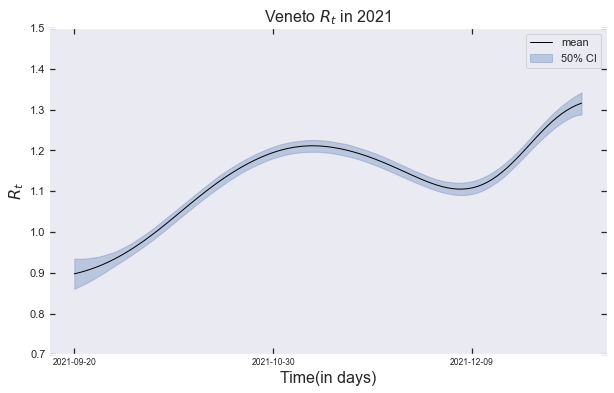

In [71]:
def get_mobdates(Rt_startdate, Rt_enddate):
    dt_format_Rtstart = datetime.strptime(Rt_startdate, '%Y-%m-%d')
    dt_format_Rtend = datetime.strptime(Rt_enddate, '%Y-%m-%d')

    dt_format_regstart = dt_format_Rtstart - timedelta(days=15)
    dt_format_regend = dt_format_Rtend - timedelta(days=15)


    reg_startdate = dt_format_regstart.strftime("%Y-%m-%d") # get it in string
    reg_enddate = dt_format_regend.strftime("%Y-%m-%d") # get it in string
    return reg_startdate, reg_enddate


#for i in regions[:-1]:
#df_r=df[df['denominazione_regione'] == 'Piemonte'] 
y=df_r['mean']
x=df_r['date']
#fig, ax = plt.subplots(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.plot(x,y,linewidth=1,color='black',label='mean')
#plt.fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
plt.fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 

# aesthetics and shit
plt.ylabel('$R_{t}$',size=16)
plt.xlabel("Time(in days)",size=16)
plt.title('Veneto $R_{t}$ in 2021',size=16)
plt.xticks(x[::40],size=8.5)
plt.legend(loc='best')
plt.ylim([0.7,1.5])

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.8,which='both')

#regions

plt.show()

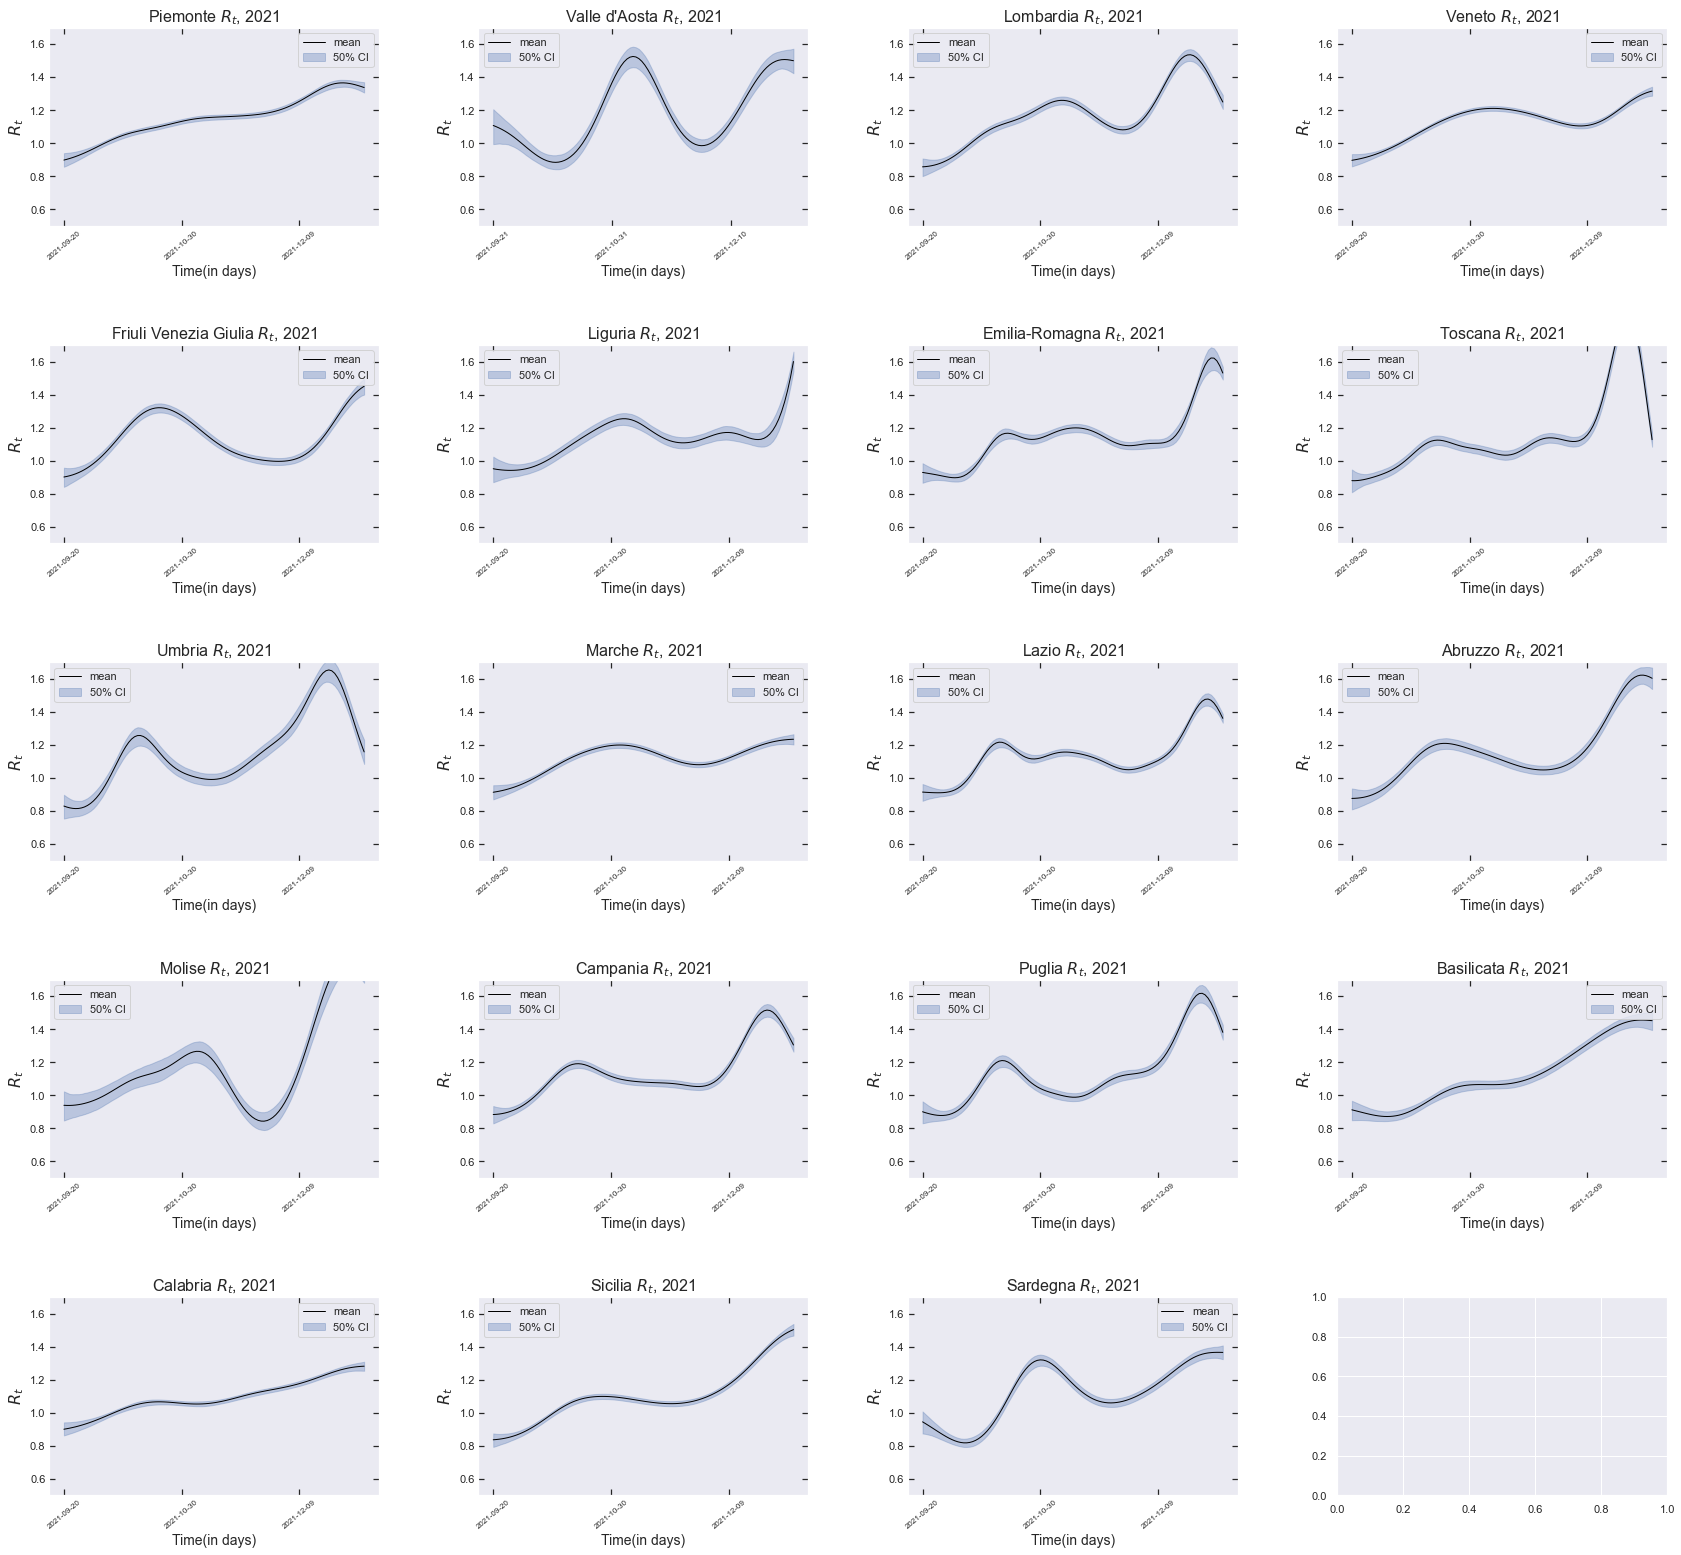

In [72]:
fig, axs = plt.subplots(5,4, figsize=(29, 27), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.6, wspace=0.3)
import matplotlib.patches as mpatches

axs = axs.ravel()
#new_regions = [regions_list[0],regions_list[2],regions_list[3],regions_list[4]]

for b,i in enumerate(regions_list):
    
    df_r=df[df['region'] == i]
    df_r=df_r[df_r['date'].between("2021-09-20","2021-12-31")]
    
    y=np.array(df_r['mean'])
    x=np.array(df_r['date'])
    #axs[b].figure(figsize=(10,6))
    axs[b].plot(x,y,linewidth=1,color='black',label='mean')
    #axs[b].fill_between(x, df_r['lower_90'], df_r['upper_90'], color='b', alpha=.6,label='10% CI')
    axs[b].fill_between(x, df_r['lower_50'], df_r['upper_50'], color='b', alpha=.3,label='50% CI') 
    
      # aesthetics and shit
    axs[b].set_ylabel('$R_{t}$',size=16)
    axs[b].set_xlabel("Time(in days)",size=14)
    axs[b].set_title('%s $R_{t}$, 2021'%i,size=16)
    axs[b].set_xticks(x[::40])
    axs[b].set_xticklabels(x[::40],fontsize=8,rotation=40)
    axs[b].legend(loc='best')
    axs[b].set_ylim([0.5,1.7])

    axs[b].tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    axs[b].grid(linestyle='--',alpha=0.8,which='both')

---------------------------------------------------------------------------------------------------------------------------

## Data forecasting

reference link: https://arxiv.org/ftp/arxiv/papers/2006/2006.01754.pdf

In [73]:
from pmdarima import auto_arima
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from pylab import rcParams
import math
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [74]:
df = pd.read_csv('ML_sardegna.csv')
df2 = pd.read_csv('ML_sicilia.csv')
df3 = pd.read_csv('ML_marche.csv')
df4 = pd.read_csv('ML_giulia.csv')
df5 = pd.read_csv('ML_campania.csv')
df6 = pd.read_csv('ML_calabria.csv')
df7 = pd.read_csv('ML_basilicata.csv')
df8 = pd.read_csv('ML_lombardia.csv')
df9 = pd.read_csv('ML_veneto.csv')
df10 = pd.read_csv('ML_liguria.csv')

In [75]:
df['retail_and_recreation_percent_change_from_baseline'] = df['retail_and_recreation_percent_change_from_baseline'].shift(5)
df['grocery_and_pharmacy_percent_change_from_baseline'] = df['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df['parks_percent_change_from_baseline'] = df['parks_percent_change_from_baseline'].shift(5)
df['transit_stations_percent_change_from_baseline'] = df['transit_stations_percent_change_from_baseline'].shift(5)
df['workplaces_percent_change_from_baseline'] = df['workplaces_percent_change_from_baseline'].shift(5)
df['residential_percent_change_from_baseline'] = df['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df2['retail_and_recreation_percent_change_from_baseline'] = df2['retail_and_recreation_percent_change_from_baseline'].shift(5)
df2['grocery_and_pharmacy_percent_change_from_baseline'] = df2['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df2['parks_percent_change_from_baseline'] = df2['parks_percent_change_from_baseline'].shift(5)
df2['transit_stations_percent_change_from_baseline'] = df2['transit_stations_percent_change_from_baseline'].shift(5)
df2['workplaces_percent_change_from_baseline'] = df2['workplaces_percent_change_from_baseline'].shift(5)
df2['residential_percent_change_from_baseline'] = df2['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df3['retail_and_recreation_percent_change_from_baseline'] = df3['retail_and_recreation_percent_change_from_baseline'].shift(5)
df3['grocery_and_pharmacy_percent_change_from_baseline'] = df3['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df3['parks_percent_change_from_baseline'] = df3['parks_percent_change_from_baseline'].shift(5)
df3['transit_stations_percent_change_from_baseline'] = df3['transit_stations_percent_change_from_baseline'].shift(5)
df3['workplaces_percent_change_from_baseline'] = df3['workplaces_percent_change_from_baseline'].shift(5)
df3['residential_percent_change_from_baseline'] = df3['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df4['retail_and_recreation_percent_change_from_baseline'] = df4['retail_and_recreation_percent_change_from_baseline'].shift(5)
df4['grocery_and_pharmacy_percent_change_from_baseline'] = df4['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df4['parks_percent_change_from_baseline'] = df4['parks_percent_change_from_baseline'].shift(5)
df4['transit_stations_percent_change_from_baseline'] = df4['transit_stations_percent_change_from_baseline'].shift(5)
df4['workplaces_percent_change_from_baseline'] = df4['workplaces_percent_change_from_baseline'].shift(5)
df4['residential_percent_change_from_baseline'] = df4['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df5['retail_and_recreation_percent_change_from_baseline'] = df5['retail_and_recreation_percent_change_from_baseline'].shift(5)
df5['grocery_and_pharmacy_percent_change_from_baseline'] = df5['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df5['parks_percent_change_from_baseline'] = df5['parks_percent_change_from_baseline'].shift(5)
df5['transit_stations_percent_change_from_baseline'] = df5['transit_stations_percent_change_from_baseline'].shift(5)
df5['workplaces_percent_change_from_baseline'] = df5['workplaces_percent_change_from_baseline'].shift(5)
df5['residential_percent_change_from_baseline'] = df5['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df6['retail_and_recreation_percent_change_from_baseline'] = df6['retail_and_recreation_percent_change_from_baseline'].shift(5)
df6['grocery_and_pharmacy_percent_change_from_baseline'] = df6['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df6['parks_percent_change_from_baseline'] = df6['parks_percent_change_from_baseline'].shift(5)
df6['transit_stations_percent_change_from_baseline'] = df6['transit_stations_percent_change_from_baseline'].shift(5)
df6['workplaces_percent_change_from_baseline'] = df6['workplaces_percent_change_from_baseline'].shift(5)
df6['residential_percent_change_from_baseline'] = df6['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df7['retail_and_recreation_percent_change_from_baseline'] = df7['retail_and_recreation_percent_change_from_baseline'].shift(5)
df7['grocery_and_pharmacy_percent_change_from_baseline'] = df7['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df7['parks_percent_change_from_baseline'] = df7['parks_percent_change_from_baseline'].shift(5)
df7['transit_stations_percent_change_from_baseline'] = df7['transit_stations_percent_change_from_baseline'].shift(5)
df7['workplaces_percent_change_from_baseline'] = df7['workplaces_percent_change_from_baseline'].shift(5)
df7['residential_percent_change_from_baseline'] = df7['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df8['retail_and_recreation_percent_change_from_baseline'] = df8['retail_and_recreation_percent_change_from_baseline'].shift(5)
df8['grocery_and_pharmacy_percent_change_from_baseline'] = df8['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df8['parks_percent_change_from_baseline'] = df8['parks_percent_change_from_baseline'].shift(5)
df8['transit_stations_percent_change_from_baseline'] = df8['transit_stations_percent_change_from_baseline'].shift(5)
df8['workplaces_percent_change_from_baseline'] = df8['workplaces_percent_change_from_baseline'].shift(5)
df8['residential_percent_change_from_baseline'] = df8['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df9['retail_and_recreation_percent_change_from_baseline'] = df9['retail_and_recreation_percent_change_from_baseline'].shift(5)
df9['grocery_and_pharmacy_percent_change_from_baseline'] = df9['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df9['parks_percent_change_from_baseline'] = df9['parks_percent_change_from_baseline'].shift(5)
df9['transit_stations_percent_change_from_baseline'] = df9['transit_stations_percent_change_from_baseline'].shift(5)
df9['workplaces_percent_change_from_baseline'] = df9['workplaces_percent_change_from_baseline'].shift(5)
df9['residential_percent_change_from_baseline'] = df9['residential_percent_change_from_baseline'].shift(5)

#-----------------------------------------------------------------------------------------------------------------------------

df10['retail_and_recreation_percent_change_from_baseline'] = df10['retail_and_recreation_percent_change_from_baseline'].shift(5)
df10['grocery_and_pharmacy_percent_change_from_baseline'] = df10['grocery_and_pharmacy_percent_change_from_baseline'].shift(5)
df10['parks_percent_change_from_baseline'] = df10['parks_percent_change_from_baseline'].shift(5)
df10['transit_stations_percent_change_from_baseline'] = df10['transit_stations_percent_change_from_baseline'].shift(5)
df10['workplaces_percent_change_from_baseline'] = df10['workplaces_percent_change_from_baseline'].shift(5)
df10['residential_percent_change_from_baseline'] = df10['residential_percent_change_from_baseline'].shift(5)

Check missing values

In [76]:
pd.DataFrame(df.isnull().sum(),columns=["Count"])
pd.DataFrame(df2.isnull().sum(),columns=["Count"])
pd.DataFrame(df3.isnull().sum(),columns=["Count"])
pd.DataFrame(df4.isnull().sum(),columns=["Count"])
pd.DataFrame(df5.isnull().sum(),columns=["Count"])
pd.DataFrame(df6.isnull().sum(),columns=["Count"])
pd.DataFrame(df7.isnull().sum(),columns=["Count"])
pd.DataFrame(df8.isnull().sum(),columns=["Count"])
pd.DataFrame(df9.isnull().sum(),columns=["Count"])
pd.DataFrame(df10.isnull().sum(),columns=["Count"])

,Count
Unnamed: 0,0
sub_region_1,0
place_id,0
date,0
infected,0
retail_and_recreation_percent_change_from_baseline,5
grocery_and_pharmacy_percent_change_from_baseline,5
parks_percent_change_from_baseline,5
transit_stations_percent_change_from_baseline,5
workplaces_percent_change_from_baseline,5


In [77]:
df = df.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()
df7 = df7.dropna()
df8 = df8.dropna()
df9 = df9.dropna()
df10 = df10.dropna()

In [78]:
pd.DataFrame(df.isnull().sum(),columns=["Count"])
pd.DataFrame(df2.isnull().sum(),columns=["Count"])
pd.DataFrame(df3.isnull().sum(),columns=["Count"])
pd.DataFrame(df4.isnull().sum(),columns=["Count"])
pd.DataFrame(df5.isnull().sum(),columns=["Count"])
pd.DataFrame(df6.isnull().sum(),columns=["Count"])
pd.DataFrame(df7.isnull().sum(),columns=["Count"])
pd.DataFrame(df8.isnull().sum(),columns=["Count"])
pd.DataFrame(df9.isnull().sum(),columns=["Count"])
pd.DataFrame(df10.isnull().sum(),columns=["Count"])

,Count
Unnamed: 0,0
sub_region_1,0
place_id,0
date,0
infected,0
retail_and_recreation_percent_change_from_baseline,0
grocery_and_pharmacy_percent_change_from_baseline,0
parks_percent_change_from_baseline,0
transit_stations_percent_change_from_baseline,0
workplaces_percent_change_from_baseline,0


In [79]:
#df

In [80]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)
df3.drop(['Unnamed: 0'], axis=1, inplace=True)
df4.drop(['Unnamed: 0'], axis=1, inplace=True)
df5.drop(['Unnamed: 0'], axis=1, inplace=True)
df6.drop(['Unnamed: 0'], axis=1, inplace=True)
df7.drop(['Unnamed: 0'], axis=1, inplace=True)
df8.drop(['Unnamed: 0'], axis=1, inplace=True)
df9.drop(['Unnamed: 0'], axis=1, inplace=True)
df10.drop(['Unnamed: 0'], axis=1, inplace=True)

In [81]:
cases = df.set_index('date').asfreq('D')
cases2 = df2.set_index('date').asfreq('D')
cases3 = df3.set_index('date').asfreq('D')
cases4 = df4.set_index('date').asfreq('D')
cases5 = df5.set_index('date').asfreq('D')
cases6 = df6.set_index('date').asfreq('D')
cases7 = df7.set_index('date').asfreq('D')
cases8 = df8.set_index('date').asfreq('D')
cases9 = df9.set_index('date').asfreq('D')
cases10 = df10.set_index('date').asfreq('D')

--------------------------------------------------------------------------------------------------------------------------

#### ARIMA forecasting

Autoregression (AR): refers to a model that shows a changing variable that regresses on its own lagged, or prior, values.

Integrated (I): represents the differencing of raw observations to allow for the time series to become stationary (i.e., data values are replaced by the difference between the data values and the previous values).

Moving average (MA):  incorporates the dependency between an observation and a residual error from a moving average model applied to lagged observations.

###### Components of a Time Series:

Trend:The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).

Seasonality:The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions, or an increase in the number of airline passengers during holidays each year.

Cyclical Component: These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.

Irregular Variation: These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.

ETS Decomposition
ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend, and Seasonality.

In [82]:
df.set_index('date',inplace=True)
df.index=pd.to_datetime(df.index)
df

,sub_region_1,place_id,infected,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,
2021-01-06,Sardegna,ChIJHeK-0hzF3RIRYH0OyxW-CAE,16913,-36.285714,-13.000000,-14.428571,-47.142857,-51.571429,13.000000
2021-01-07,Sardegna,ChIJHeK-0hzF3RIRYH0OyxW-CAE,17059,-36.142857,-6.714286,-16.571429,-47.142857,-49.000000,14.571429
2021-01-08,Sardegna,ChIJHeK-0hzF3RIRYH0OyxW-CAE,17065,-39.571429,-6.142857,-22.428571,-50.142857,-48.857143,15.714286
2021-01-09,Sardegna,ChIJHeK-0hzF3RIRYH0OyxW-CAE,17142,-42.142857,-7.142857,-22.428571,-49.142857,-47.714286,15.714286
2021-01-10,Sardegna,ChIJHeK-0hzF3RIRYH0OyxW-CAE,17227,-48.000000,-9.428571,-30.285714,-51.000000,-47.857143,16.571429
...,...,...,...,...,...,...,...,...,...
2021-12-26,Sardegna,ChIJHeK-0hzF3RIRYH0OyxW-CAE,5309,6.285714,36.857143,20.000000,-8.571429,-4.714286,1.714286
2021-12-27,Sardegna,ChIJHeK-0hzF3RIRYH0OyxW-CAE,5617,8.428571,40.428571,20.142857,-7.285714,-5.285714,1.571429
2021-12-28,Sardegna,ChIJHeK-0hzF3RIRYH0OyxW-CAE,5896,11.142857,45.714286,22.142857,-5.285714,-7.428571,1.571429


In [83]:
result = seasonal_decompose(df['infected'], 
                            model ='multiplicative')


In [84]:
stepwise_fit = auto_arima(df['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=5579.148, Time=1.84 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6339.060, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5620.382, Time=0.95 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=6018.245, Time=1.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6349.293, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=5716.738, Time=0.57 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=5577.655, Time=1.87 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=5612.102, Time=0.98 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=5.05 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=5576.368, Time=5.03 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=5579.254, Time=4.97 sec
 ARIMA(1,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=6.79 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=5.33 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=5580.218, Time=4.24 sec
 ARIMA(2,0,1)(1,1,2)[12] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  359
Model:             SARIMAX(1, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -2781.184
Date:                                 Sat, 15 Jan 2022   AIC                           5576.368
Time:                                         10:36:01   BIC                           5603.313
Sample:                                              0   HQIC                          5587.096
                                                 - 359                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -29.0098     31.930     -0.909      0.364     -91.591      33.572
ar.L1          0.9533      0.009    106.114      0.000       0.936       0.971
ma.L1          0.1494      0.034      4.352      0.000       0.082       0.217
ar.S.L12      -0.6842      0.117     -5.852      0.000      -0.913      -0.455
ma.S.L12      -0.2087      0.136     -1.540      0.124      -0.474       0.057
ma.S.L24      -0.4323      0.112     -3.848      0.000      -0.652      -0.212
sigma2      4.187e+05   9135.672     45.830      0.000    4.01e+05    4.37e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            127923.58
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            -8.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        95.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Fit the model to the dataset

In [85]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing

model = SARIMAX(df['infected'], 
                order = (1, 0, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()



C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Predictions of ARIMA Model against the test set

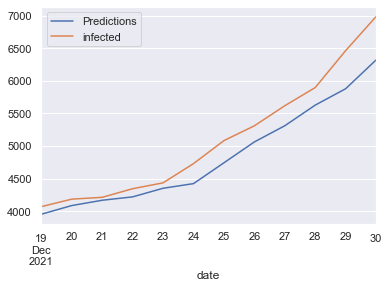

In [86]:

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)
plt.savefig('test_train')

In [87]:
rmse(test["infected"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["infected"], predictions)

105861.3637897838

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


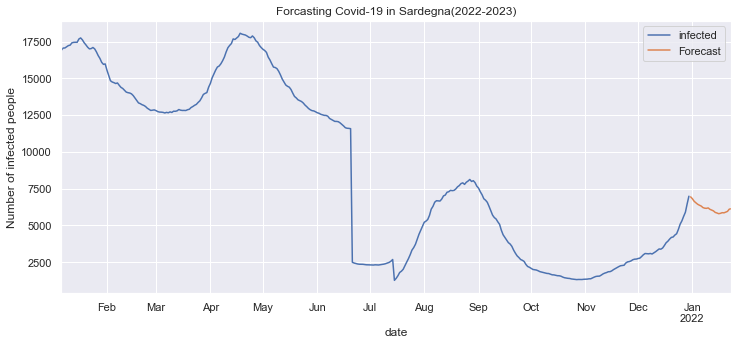

In [88]:
sns.set()
model = SARIMAX(df['infected'], 
                        order = (1, 0, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 3*8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Sardegna(2022-2023)")
plt.ylabel("Number of infected people")
plt.savefig('ARIMA_1')

--------------------------------------------------------------------------------------------------------------------------

In [89]:
df2.set_index('date',inplace=True)
df2.index=pd.to_datetime(df2.index)

In [90]:

result2 = seasonal_decompose(df2['infected'], 
                            model ='multiplicative')
#result.plot()

In [91]:
stepwise_fit2 = auto_arima(df2['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=5548.936, Time=2.15 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5665.212, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5608.971, Time=0.34 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5614.734, Time=0.57 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=5618.102, Time=0.12 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.36 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=inf, Time=5.28 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=5580.036, Time=0.89 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=5.11 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=5597.702, Time=0.52 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=5545.249, Time=2.41 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=5618.183, Time=0.17 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=2.51 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=inf, Time=4.05 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=5

In [92]:
train = df2.iloc[:len(df2)-12]
test = df2.iloc[len(df2)-12:] # set one year(12 months) for testing

model = SARIMAX(df2['infected'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

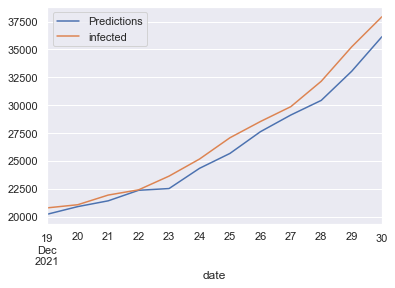

In [93]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

In [94]:
rmse(test["infected"], predictions)
  
# Calculate mean squared error
mean_squared_error(test["infected"], predictions)

1406791.8101110945

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


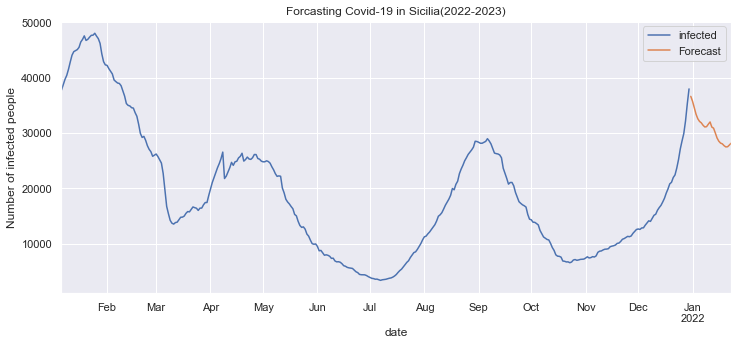

In [95]:
model = SARIMAX(df2['infected'], 
                        order = (1, 0, 0), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df2), 
                          end = (len(df2)-1) + 3 * 8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df2['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Sicilia(2022-2023)")
plt.ylabel("Number of infected people")
plt.savefig('ARIMA_2')

-----------------------------------------------------------------------------------------------------------------

In [96]:
df3.set_index('date',inplace=True)
df3.index=pd.to_datetime(df3.index)

result3 = seasonal_decompose(df3['infected'], 
                            model ='multiplicative')
#result.plot()

In [97]:
stepwise_fit3 = auto_arima(df3['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=4433.615, Time=0.89 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4748.310, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4484.236, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4478.575, Time=0.62 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=4564.438, Time=0.19 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=4435.512, Time=1.09 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=4435.510, Time=2.28 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4480.773, Time=0.33 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=4437.428, Time=3.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4431.648, Time=0.41 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4573.165, Time=0.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=4433.568, Time=0.79 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=4433.568, Time=1.36 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=4435.471, Time=3.05 sec
 ARIMA(0,1,0)(0,1,1

In [98]:
train = df3.iloc[:len(df3)-12]
test = df3.iloc[len(df3)-12:] # set one year(12 months) for testing

model = SARIMAX(df3['infected'], 
                order = (2, 1, 3), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


<AxesSubplot:xlabel='date'>

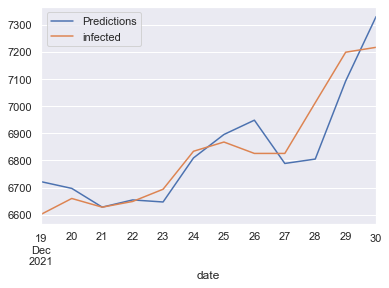

In [99]:
start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


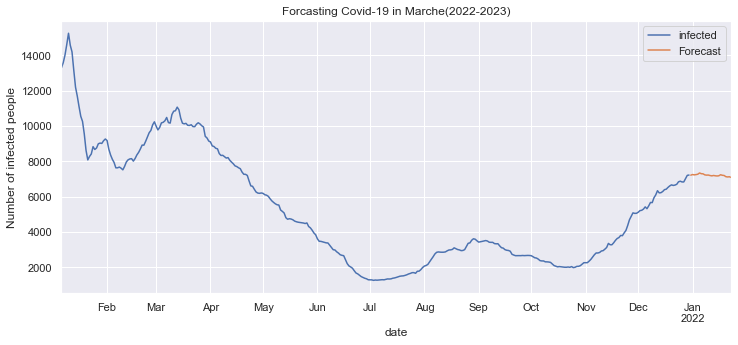

In [100]:
model = SARIMAX(df3['infected'], 
                        order = (0, 1, 0), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df3), 
                          end = (len(df3)-1) + 3 * 8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df3['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Marche(2022-2023)")
plt.ylabel("Number of infected people")
plt.savefig('ARIMA_3')

-----------------------------------------------------------------------------------------------------------------

In [101]:
df4.set_index('date',inplace=True)
df4.index=pd.to_datetime(df4.index)

result4 = seasonal_decompose(df4['infected'], 
                            model ='multiplicative')

In [102]:
stepwise_fit4 = auto_arima(df4['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.18 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5090.028, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5018.371, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5086.156, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4994.867, Time=0.60 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.01 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5008.819, Time=0.40 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4983.071, Time=0.79 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5009.290, Time=0.31 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.04 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=4981.310, Time=0.96 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=5008.1

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

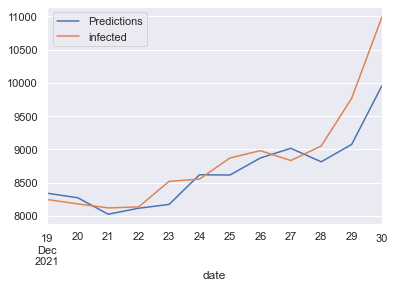

In [103]:
train = df4.iloc[:len(df4)-12]
test = df4.iloc[len(df4)-12:] # set one year(12 months) for testing

model = SARIMAX(df4['infected'], 
                order = (0, 1, 2), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


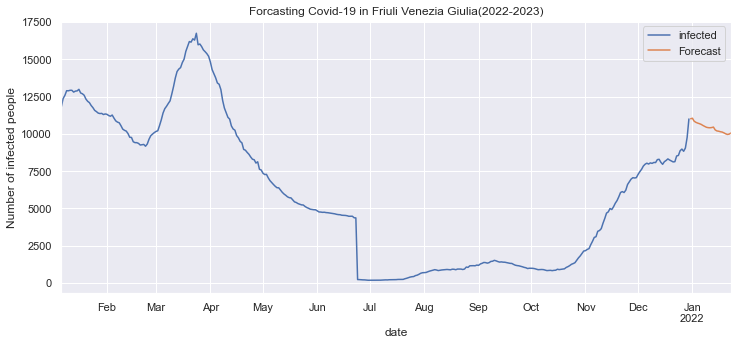

In [104]:
model = SARIMAX(df4['infected'], 
                        order = (1, 0, 0), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df4),
                          end = (len(df4)-1) + 3 *8 , 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df4['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Friuli Venezia Giulia(2022-2023)")
plt.ylabel("Number of infected people")
plt.savefig('ARIMA_4')

----------------------------------------------------------------------------------------------------------

In [105]:
df5.set_index('date',inplace=True)
df5.index=pd.to_datetime(df5.index)

result5 = seasonal_decompose(df5['infected'], 
                            model ='multiplicative')

In [106]:
stepwise_fit5 = auto_arima(df5['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.84 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6695.193, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6655.556, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6625.889, Time=0.26 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6696.649, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6609.615, Time=0.44 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6655.201, Time=0.23 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=6611.223, Time=1.21 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=6611.246, Time=1.81 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=6610.525, Time=0.94 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6634.791, Time=0.64 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=5.77 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=2.32 sec
 ARIMA(0,1,2)(1,1,1)[12]             : 

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

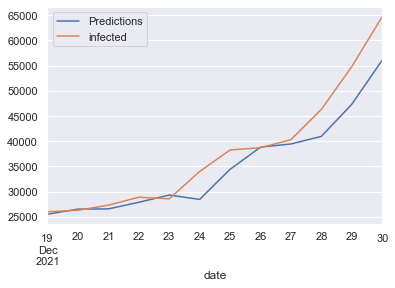

In [107]:
train = df5.iloc[:len(df5)-12]
test = df5.iloc[len(df5)-12:] # set one year(12 months) for testing

model = SARIMAX(df5['infected'], 
                order = (1, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


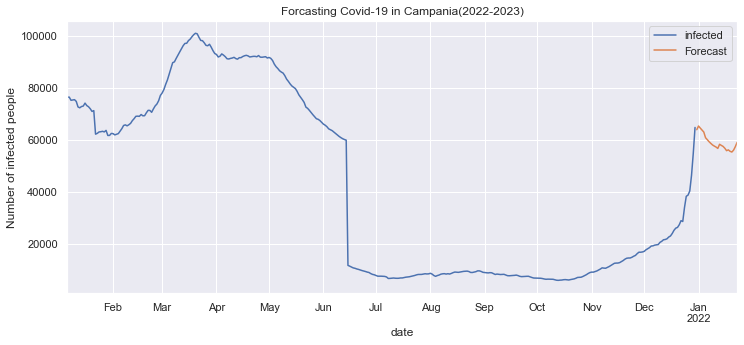

In [108]:
model = SARIMAX(df5['infected'], 
                        order = (1, 0, 0), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df5), 
                          end = (len(df5)-1) + 3 * 8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df5['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Campania(2022-2023)")
plt.ylabel("Number of infected people")
plt.savefig('ARIMA_5')

-----------------------------------------------------------------------------------------------------

In [109]:
df6.set_index('date',inplace=True)
df6.index=pd.to_datetime(df6.index)

result6 = seasonal_decompose(df6['infected'], 
                            model ='multiplicative')

In [110]:
stepwise_fit6 = auto_arima(df6['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=1.17 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=4818.753, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=4677.856, Time=0.25 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=4767.317, Time=0.05 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=4616.721, Time=0.69 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=2.07 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.66 sec
 ARIMA(0,2,0)(2,1,0)[12]             : AIC=4685.151, Time=0.61 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=4611.056, Time=1.22 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=4670.123, Time=0.44 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=3.48 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.62 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=4598.918, Time=2.00 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=4658.0

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

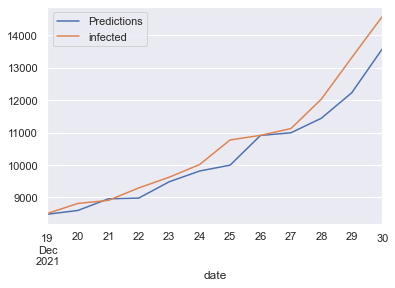

In [111]:
train = df6.iloc[:len(df6)-12]
test = df6.iloc[len(df6)-12:] # set one year(12 months) for testing

model = SARIMAX(df6['infected'], 
                order = (0, 1, 0), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ADMIN\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


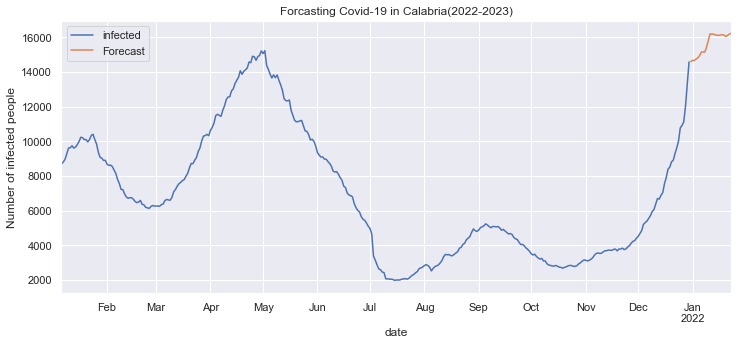

In [112]:
model = SARIMAX(df6['infected'], 
                        order = (1, 0, 0), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df6), 
                          end = (len(df6)-1) + 3 * 8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df6['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Calabria(2022-2023)")
plt.ylabel("Number of infected people")
plt.savefig('ARIMA_6')

-------------------------------------------------------------------------------------------------

In [113]:
df7.set_index('date',inplace=True)
df7.index=pd.to_datetime(df7.index)

result7 = seasonal_decompose(df7['infected'], 
                            model ='multiplicative')

In [114]:
stepwise_fit7 = auto_arima(df7['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4528.300, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4312.454, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.46 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4415.048, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4289.690, Time=0.58 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.95 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4411.815, Time=0.53 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=4290.928, Time=1.27 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=4287.844, Time=1.15 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=4313.090, Time=0.58 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=4.54 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4319.2

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

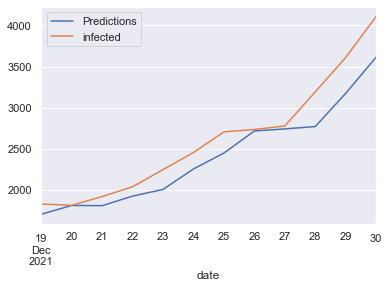

In [115]:
train = df7.iloc[:len(df7)-12]
test = df7.iloc[len(df7)-12:] # set one year(12 months) for testing

model = SARIMAX(df7['infected'], 
                order = (0, 1, 0), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\ADMIN\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Text(0, 0.5, 'Number of infected people')

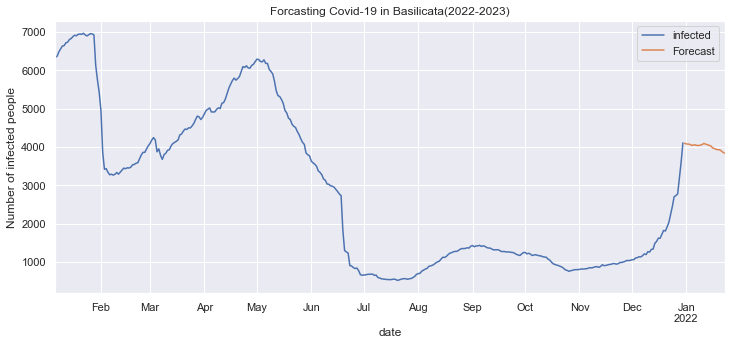

In [116]:
model = SARIMAX(df7['infected'], 
                        order = (1, 0, 0), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df7), 
                          end = (len(df7)-1) + 3 * 8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df7['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Basilicata(2022-2023)")
plt.ylabel("Number of infected people")

-------------------------------------------------------------------------------------------------------------

In [117]:
df8.set_index('date',inplace=True)
df8.index=pd.to_datetime(df8.index)

result8 = seasonal_decompose(df8['infected'], 
                            model ='multiplicative')

In [118]:
stepwise_fit8 = auto_arima(df8['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=6425.498, Time=0.37 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=6512.387, Time=0.04 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=6467.737, Time=0.22 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=6433.827, Time=0.52 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=6458.361, Time=0.08 sec
 ARIMA(1,2,1)(1,1,1)[12]             : AIC=6402.173, Time=1.35 sec
 ARIMA(1,2,1)(1,1,0)[12]             : AIC=6437.899, Time=0.36 sec
 ARIMA(1,2,1)(2,1,1)[12]             : AIC=6403.156, Time=3.65 sec
 ARIMA(1,2,1)(1,1,2)[12]             : AIC=6403.350, Time=3.48 sec
 ARIMA(1,2,1)(0,1,2)[12]             : AIC=6411.119, Time=1.25 sec
 ARIMA(1,2,1)(2,1,0)[12]             : AIC=6428.253, Time=1.63 sec
 ARIMA(1,2,1)(2,1,2)[12]             : AIC=inf, Time=4.83 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=6414.755, Time=1.14 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=1.60 sec
 ARIMA(2,2,1)(1,1,1)[12]     

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

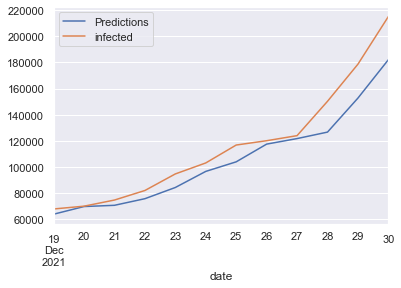

In [119]:
train = df8.iloc[:len(df8)-12]
test = df8.iloc[len(df8)-12:] # set one year(12 months) for testing

model = SARIMAX(df8['infected'], 
                order = (0, 1, 0), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Text(0, 0.5, 'Number of infected people')

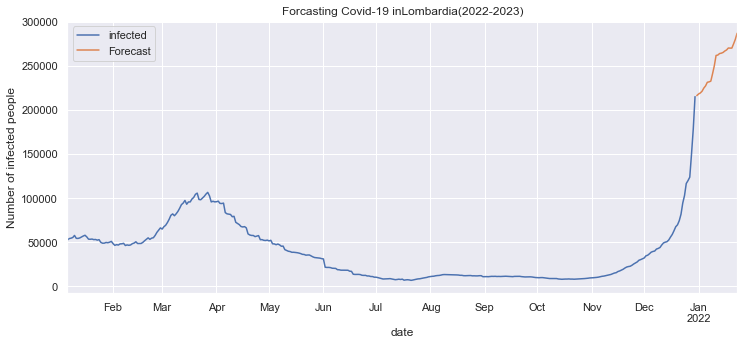

In [120]:
model = SARIMAX(df8['infected'], 
                        order = (1, 0, 0), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df8), 
                          end = (len(df8)-1) + 3 * 8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df8['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 inLombardia(2022-2023)")
plt.ylabel("Number of infected people")

------------------------------------------------------------------------------------------------

In [121]:
df9.set_index('date',inplace=True)
df9.index=pd.to_datetime(df9.index)

result9 = seasonal_decompose(df9['infected'], 
                            model ='multiplicative')

In [122]:
stepwise_fit9 = auto_arima(df9['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=5548.072, Time=0.31 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5733.213, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5575.040, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5620.838, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=5546.182, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=5548.089, Time=0.20 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=5545.275, Time=0.74 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=5541.636, Time=1.67 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5540.031, Time=0.58 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5612.847, Time=0.37 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5567.384, Time=0.32 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5541.636, Time=1.32 sec
 ARIMA(1,1,2)(2,1,0)[12]             : AIC=5541.266, Time=0.65 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5725.430, Time=0.81 sec
 ARIMA(0,1,2)(2,1,0

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

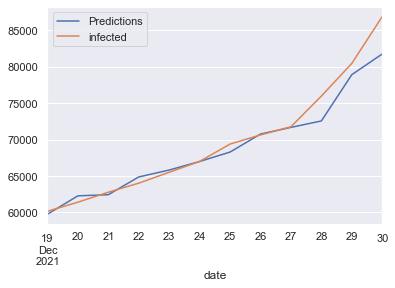

In [123]:
train = df9.iloc[:len(df9)-12]
test = df9.iloc[len(df9)-12:] # set one year(12 months) for testing

model = SARIMAX(df9['infected'], 
                order = (0, 1, 0), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


Text(0, 0.5, 'Number of infected people')

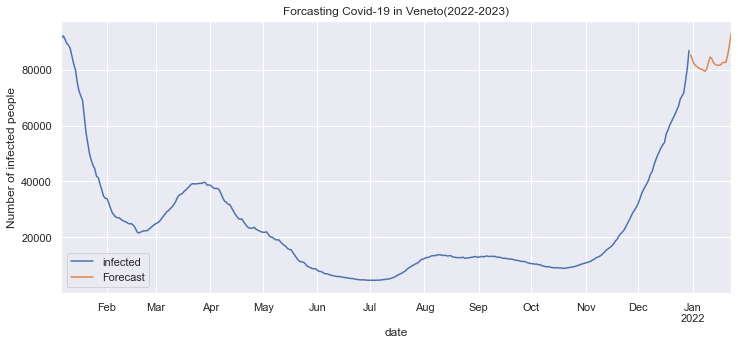

In [124]:
model = SARIMAX(df9['infected'], 
                        order = (1, 0, 0), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df9), 
                          end = (len(df9)-1) + 3 * 8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df9['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Veneto(2022-2023)")
plt.ylabel("Number of infected people")

----------------------------------------------------------------------------------------------------------------------

In [125]:
df10.set_index('date',inplace=True)
df10.index=pd.to_datetime(df10.index)

result10 = seasonal_decompose(df10['infected'], 
                            model ='multiplicative')

In [126]:
stepwise_fit10 = auto_arima(df10['infected'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4474.711, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4392.485, Time=0.23 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4377.120, Time=0.54 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4459.970, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4379.105, Time=1.13 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4379.111, Time=1.94 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4396.029, Time=0.26 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4378.926, Time=3.62 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4409.240, Time=0.25 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=4371.451, Time=0.67 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=4461.297, Time=0.06 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=4373.392, Time=1.24 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=4373.405, Time=1.80 sec
 ARIMA(0,1,2)(1,1,0)[12]

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='date'>

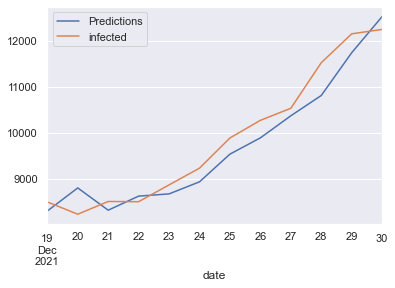

In [127]:
train = df10.iloc[:len(df10)-12]
test = df10.iloc[len(df10)-12:] # set one year(12 months) for testing

model = SARIMAX(df10['infected'], 
                order = (0, 1, 0), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['infected'].plot(legend = True)

C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ADMIN\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Text(0, 0.5, 'Number of infected people')

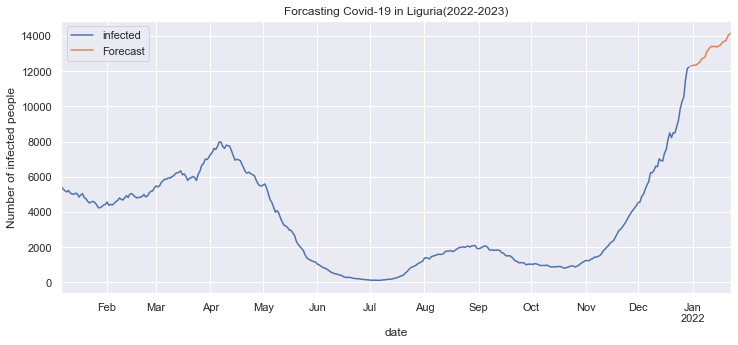

In [128]:
model = SARIMAX(df10['infected'], 
                        order = (1, 0, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df10), 
                          end = (len(df10)-1) + 3 * 8, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df10['infected'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Liguria(2022-2023)")
plt.ylabel("Number of infected people")

------------------------------------------------------------------------------------------------------------------------

#### facebook prophet forcasting

In [129]:
import fbprophet as fbp
from sklearn.metrics import mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
stepwise_fit9 = auto_arima(df9['retail_and_recreation_percent_change_from_baseline'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  

In [ ]:
train = df9.iloc[:len(df9)-12]
test = df9.iloc[len(df9)-12:] # set one year(12 months) for testing

model = SARIMAX(df9['retail_and_recreation_percent_change_from_baseline'], 
                order = (0, 1, 0), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['retail_and_recreation_percent_change_from_baseline'].plot(legend = True)

In [ ]:
model = SARIMAX(df9['retail_and_recreation_percent_change_from_baseline'], 
                        order = (1, 0, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next year
forecast = result.predict(start = len(df9), 
                          end = (len(df9)-1) + 3 * 100, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df9['retail_and_recreation_percent_change_from_baseline'].plot(figsize = (12, 5), legend = True)

forecast.plot(legend = True)
plt.title("Forcasting Covid-19 in Liguria(2022-2023)")
plt.ylabel("Number of infected people")